# Projeto 2 - NLP - Twiter

-----

Nome:  Tiago Lyrio  
Turma: 781

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

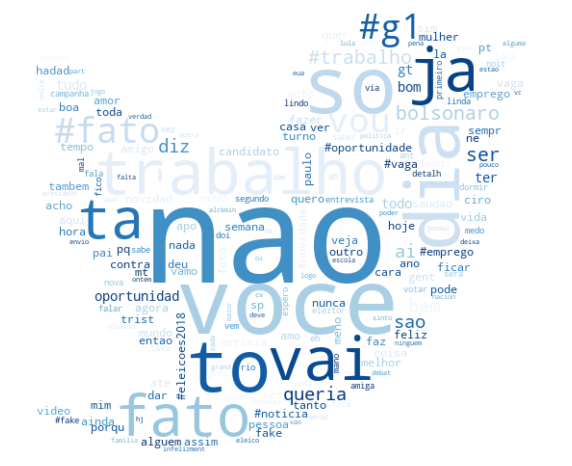

In [1236]:
#Twitter Wordcloud

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 23/02/2022;


- Aula de monitoria: 09/03/2022;


- Data de entrega: 14/03/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import emot
import emoji
from unidecode import unidecode
import re

import random
from collections import defaultdict

In [2]:
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec,doc2vec

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import EMOTICON_RE
from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

random_seed = 42

In [3]:
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

## Configurações do XGBoost

In [4]:
#configurações para usar o modelo da GPU e tirar alguns warnings
XGBoost_warning = {'use_label_encoder':False,'eval_metric' :'logloss'}
XGBoost_gpu = {'tree_method':'gpu_hist', 'gpu_id':0,'predictor':'gpu_predictor'}

## Configurações do LGBM

In [5]:
#configurações para usar o modelo da GPU e tirar alguns warnings
LGBM_gpu = {'device':"gpu",'verbose':-1,'n_jobs':-1}


#parâmetros do LGBM baseados no benchmark de CPU que eles conduziram
# https://lightgbm.readthedocs.io/en/latest/GPU-Performance.html

# o parâmetro tree learnin foi escolhido utilizando a tabela do link abaixo:
# https://lightgbm.readthedocs.io/en/latest/Parallel-Learning-Guide.html
# n feature is large and n data is large -> Voting parallel (tree_learner=voting)

LGBM_benchmark = {'max_bin':63,               
'tree_learner':'voting',
'num_leaves':127,
'n_estimators':500,
'learning_rate':0.05}

# EDA

## Lendo o CSV

In [6]:
df = pd.read_csv('Dados/train/Train3Classes.csv')
df.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)


In [7]:
df_subm = pd.read_csv('Dados/subm/Subm3Classes.csv')
df_subm.head()

,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)


## Dados faltantes

In [8]:
df.isna().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

Não existem dados faltantes

## Dados duplicados.

### Tweets com o mesmo ID:

In [9]:
df.duplicated(subset='id').sum()

13

In [10]:
df[df.duplicated(subset='id',keep = False)].sort_values(['id'])

,id,tweet_text,tweet_date,sentiment,query_used
39184,1037082879438729216,O que é #FATO ou #FAKE na entrevista de Gerald...,Tue Sep 04 21:00:01 +0000 2018,2,#fato
38913,1037082879438729216,O que é #FATO ou #FAKE na entrevista de Gerald...,Tue Sep 04 21:00:01 +0000 2018,2,jornaloglobo
35012,1037837855433928704,Veja o que é #FATO ou #FAKE na entrevista de E...,Thu Sep 06 23:00:01 +0000 2018,2,#fato
20226,1037837855433928704,Veja o que é #FATO ou #FAKE na entrevista de E...,Thu Sep 06 23:00:01 +0000 2018,2,jornaloglobo
39324,1038222887432273920,Veja o que é #FATO ou #FAKE na entrevista de F...,Sat Sep 08 00:30:00 +0000 2018,2,jornaloglobo
83565,1038222887432273920,Veja o que é #FATO ou #FAKE na entrevista de F...,Sat Sep 08 00:30:00 +0000 2018,2,#fato
69100,1038494427503837185,Veja o que é #FATO ou #FAKE na entrevista de H...,Sat Sep 08 18:29:00 +0000 2018,2,#fato
35849,1038494427503837185,Veja o que é #FATO ou #FAKE na entrevista de H...,Sat Sep 08 18:29:00 +0000 2018,2,jornaloglobo
62236,1038570177191993344,Veja o que é #FATO ou #FAKE na entrevista de H...,Sat Sep 08 23:30:00 +0000 2018,2,#fato
93665,1038570177191993344,Veja o que é #FATO ou #FAKE na entrevista de H...,Sat Sep 08 23:30:00 +0000 2018,2,jornaloglobo


O mesmo tweete: ID 1050747512179576834 foi classificado como 1 e 2.

### Tweets com o mesmo texto (já contempla o mesmo ID)

In [11]:
df.duplicated(subset='tweet_text').sum()

816

In [12]:
df[df.duplicated(subset='tweet_text',keep = False)].sort_values(['id'])

,id,tweet_text,tweet_date,sentiment,query_used
46135,1030473769058545664,"Motorista Carreteiro - Jundiaí, SP https://t.c...",Fri Aug 17 15:17:46 +0000 2018,2,#oportunidade
48416,1030535059361685505,#Vaga para Auxiliar de Expedição detalhes e en...,Fri Aug 17 19:21:19 +0000 2018,2,#oportunidade
24892,1030566247644258304,"Corretor de Imóveis - Campinas, SP https://t.c...",Fri Aug 17 21:25:15 +0000 2018,2,#oportunidade
8778,1030566517241470977,"Costumer Success - Belo Horizonte, MG https://...",Fri Aug 17 21:26:19 +0000 2018,2,#oportunidade
84507,1030572495554920449,"Auxiliar de Limpeza - Jundiaí, SP https://t.co...",Fri Aug 17 21:50:04 +0000 2018,2,#oportunidade
...,...,...,...,...,...
29614,1052187475571953665,"Ninguém é tão feio como na identidade, bonito ...",Tue Oct 16 13:20:17 +0000 2018,2,#fato
72943,1052208299729244162,Receita De Torta De Rabanada #Fodas #compartil...,Tue Oct 16 14:43:02 +0000 2018,2,#novidade
48010,1052883788865396736,#Vaga para Churrasqueiro(a) detalhes e envio d...,Thu Oct 18 11:27:11 +0000 2018,2,#oportunidade
14692,1052887682890784769,#Vaga para Auxiliar de Produção detalhes e env...,Thu Oct 18 11:42:39 +0000 2018,2,#oportunidade


### Sentimento dos tweets duplicados

In [13]:
df[df.duplicated(subset='tweet_text',keep = False)]['sentiment'].value_counts()

1    595
0    394
2    311
Name: sentiment, dtype: int64

In [14]:
mask = (df.duplicated(subset='tweet_text',keep = False)) & (df['sentiment']==0)
df[mask]

,id,tweet_text,tweet_date,sentiment,query_used
99,1046793044547309568,bar :( : 77a55f10-0caf-41ea-9e2b-11e664d85658,Mon Oct 01 16:04:44 +0000 2018,0,:(
623,1046228667200925698,só queria dormir :(,Sun Sep 30 02:42:06 +0000 2018,0,:(
670,1049309105842802688,bar :-( : b4308b01-796e-4f43-b4c5-2c8827a683d3,Mon Oct 08 14:42:40 +0000 2018,0,:(
1108,1046934501774020608,poxa :(,Tue Oct 02 01:26:50 +0000 2018,0,:(
1155,1046754897574744065,bar :-( : 0bdd4308-49f6-4fdb-8b57-3c80e75e53f3,Mon Oct 01 13:33:10 +0000 2018,0,:(
...,...,...,...,...,...
94349,1047007825636020224,bar :-( : e48e41cc-3124-4f89-b56b-39871e1f8771,Tue Oct 02 06:18:12 +0000 2018,0,:(
94366,1049259714821967873,bar :-( : b0ee7128-9351-44a6-861e-ca45a3ce2f46,Mon Oct 08 11:26:24 +0000 2018,0,:(
94637,1049260189524873217,bar :-( : b0ee7128-9351-44a6-861e-ca45a3ce2f46,Mon Oct 08 11:28:18 +0000 2018,0,:(
94669,1046742789659099136,"Dólar subiu :( - R$4,06 às 09:39",Mon Oct 01 12:45:03 +0000 2018,0,:(


In [15]:
mask = (df.duplicated(subset='tweet_text',keep = False)) & (df['sentiment']==1)
df[mask]

,id,tweet_text,tweet_date,sentiment,query_used
312,1047493984707207173,"Dólar caiu :) - R$3,84 às 11:20",Wed Oct 03 14:30:02 +0000 2018,1,:)
349,1045513129776623616,foo :) : e110c342-6b9f-450e-9fb3-a71b52745ae5,Fri Sep 28 03:18:49 +0000 2018,1,:)
720,1049206018608181248,foo :-) : 1ae8e265-5b27-4ff7-ba9a-de68c20e06b1,Mon Oct 08 07:53:02 +0000 2018,1,:)
827,1049259258481664000,foo :-) : 063a22b1-df93-4949-ba24-87300605f2fd,Mon Oct 08 11:24:36 +0000 2018,1,:)
898,1045342306805592064,"Dólar caiu :) - R$4,00 às 12:50",Thu Sep 27 16:00:02 +0000 2018,1,:)
...,...,...,...,...,...
93872,1047314767445204993,foo :-) : 9e715cae-6e19-4700-9e84-245afbabca6f,Wed Oct 03 02:37:53 +0000 2018,1,:)
94154,1046736687332814854,Bom diaa :),Mon Oct 01 12:20:48 +0000 2018,1,:)
94236,1049288726256529409,foo :-) : ade66e5a-b7ba-4ab6-92e5-351d778aa701,Mon Oct 08 13:21:41 +0000 2018,1,:)
94495,1049268237433823232,Nós da Bodi Véi desejamos um bom dia e uma óti...,Mon Oct 08 12:00:16 +0000 2018,1,:)


In [16]:
mask = (df.duplicated(subset='tweet_text',keep = False)) & (df['sentiment']==2)
df[mask]

,id,tweet_text,tweet_date,sentiment,query_used
422,1048248713532100609,Vai estar fora no dia da eleição? Veja como ju...,Fri Oct 05 16:29:03 +0000 2018,2,g1
919,1042812403589816321,"Vendedor PAP (Porta a Porta) - Campinas, SP ht...",Thu Sep 20 16:27:06 +0000 2018,2,#oportunidade
2442,1040694513931612162,#Vaga para Líder de Expedição detalhes e envio...,Fri Sep 14 20:11:21 +0000 2018,2,#oportunidade
2946,1043589032687677440,A democracia vale até que você declare seu vot...,Sat Sep 22 19:53:08 +0000 2018,2,#fato
3161,1038599374975258625,Veja o que é #FATO ou #FAKE na entrevista de H...,Sun Sep 09 01:26:01 +0000 2018,2,#fato
...,...,...,...,...,...
93665,1038570177191993344,Veja o que é #FATO ou #FAKE na entrevista de H...,Sat Sep 08 23:30:00 +0000 2018,2,jornaloglobo
93856,1041787593921363968,"Confeiteiro/Panificador - Itajaí, SC https://t...",Mon Sep 17 20:34:52 +0000 2018,2,#oportunidade
93996,1033100322749796356,"Auxiliar de Limpeza - Jundiaí, SP https://t.co...",Fri Aug 24 21:14:45 +0000 2018,2,#oportunidade
94138,1042014579436474368,"Marketing de assinaturas - São Paulo, SP https...",Tue Sep 18 11:36:50 +0000 2018,2,#oportunidade


Vamos dropar os tweetes duplicados (mesmo texto)

In [17]:
df.drop_duplicates(subset='tweet_text',inplace=True)
df.reset_index(drop = True,  inplace = True)

In [18]:
df.duplicated(subset='id').sum()

0

In [19]:
df.duplicated(subset='tweet_text').sum()

0

## Informações de data e horário

In [20]:
df['date_info'] = pd.to_datetime(df['tweet_date'])
df['day_name'] = df['date_info'].dt.day_name()
df['month_name'] = df['date_info'].dt.month_name()
df['week_of_year'] = df['date_info'].dt.isocalendar().week
df['day'] = df['date_info'].dt.day
df['year'] = df['date_info'].dt.year
df['hour'] = df['date_info'].dt.hour
df.head()

,id,tweet_text,tweet_date,sentiment,query_used,date_info,day_name,month_name,week_of_year,day,year,hour
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha,2018-10-09 18:00:01+00:00,Tuesday,October,41,9,2018,18
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(,2018-09-30 04:11:28+00:00,Sunday,September,39,30,2018,4
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame,2018-09-17 17:44:06+00:00,Monday,September,38,17,2018,17
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(,2018-10-02 01:37:06+00:00,Tuesday,October,40,2,2018,1
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:),2018-10-03 03:25:55+00:00,Wednesday,October,40,3,2018,3


In [21]:
df.describe()

,id,sentiment,week_of_year,day,year,hour
count,9.418400e+04,94184.000000,94184.000000,94184.000000,94184.0,94184.000000
mean,1.045739e+18,1.000085,39.331691,11.460620,2018.0,10.766351
std,4.255090e+15,0.817246,1.770624,9.882831,0.0,6.765739
min,1.027374e+18,0.000000,32.000000,1.000000,2018.0,0.000000
25%,1.045370e+18,0.000000,39.000000,3.000000,2018.0,4.000000
50%,1.046814e+18,1.000000,40.000000,8.000000,2018.0,12.000000
75%,1.049105e+18,2.000000,41.000000,20.000000,2018.0,16.000000
max,1.053355e+18,2.000000,42.000000,31.000000,2018.0,23.000000


Todos os tweets são de 2018. Vamos eliminar a coluna 'year'. Vamos eliminar a coluna 'date_info' também, pois já extraímos as informações dela.

In [22]:
df.drop(columns=[ 'year','date_info'],inplace=True)
df.head()

,id,tweet_text,tweet_date,sentiment,query_used,day_name,month_name,week_of_year,day,hour
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha,Tuesday,October,41,9,18
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(,Sunday,September,39,30,4
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame,Monday,September,38,17,17
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(,Tuesday,October,40,2,1
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:),Wednesday,October,40,3,3


## Como o dataset é composto:

Aparentemente o dataset é o resultado do retorno de várias querys.

Todos os sentimentos positivos vem da query ':)'. Os negativos vem da query ':(' e os demais são neutros.

##### Querys usadas

In [23]:
df['query_used'].value_counts()

:(               31448
:)               31280
folha             4994
estadao           3880
#fato             3436
g1                3435
exame             3417
#trabalho         3027
jornaloglobo      2370
#oportunidade     2350
veja              2137
#noticia          1113
#novidade          916
#curiosidade       381
Name: query_used, dtype: int64

##### Querys de cada sentimento

In [24]:
print('='*30)
for sentimento in sorted(df['sentiment'].unique()):
    mask = df['sentiment']==sentimento
    print('Sentimento:',sentimento)
    print('Querys:')
    print('\t',end='')
    print(('\n\t').join(df.loc[mask,'query_used'].value_counts().index.to_list()))
    print('='*30)

Sentimento: 0
Querys:
	:(
Sentimento: 1
Querys:
	:)
Sentimento: 2
Querys:
	folha
	estadao
	#fato
	g1
	exame
	#trabalho
	jornaloglobo
	#oportunidade
	veja
	#noticia
	#novidade
	#curiosidade


## Pré processamento (inicial)

##### Stopwords

In [25]:
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_pt.update(['pra','pro'])

##### Dicionário de emoticons

In [26]:
#valor padrão a ser retornado
def def_value():
    return ''

#pega só a primeira palavra da descrição
emot_short = []
for description in emot.EMOTICONS_EMO.values():
    short_description = description.split(" ")[0].strip(' ,').lower()
    
    if short_description == 'great': short_description = 'dismay'
    elif short_description == 'very': short_description = 'happy'
        
    emot_short.append(short_description)
    
#declarando o defaultdict
emot_dict = defaultdict(def_value)

#juntando os emoticons com a palavra que os define
emot_dict.update(dict(zip(emot.EMOTICONS_EMO.keys(),emot_short)))
emot_dict

defaultdict(<function __main__.def_value()>,
            {':‑)': 'happy',
             ':-))': 'happy',
             ':-)))': 'happy',
             ':)': 'happy',
             ':))': 'happy',
             ':)))': 'happy',
             ':-]': 'happy',
             ':]': 'happy',
             ':-3': 'happy',
             ':3': 'happy',
             ':->': 'happy',
             ':>': 'happy',
             '8-)': 'happy',
             ':o)': 'happy',
             ':-}': 'happy',
             ':}': 'happy',
             ':-)': 'happy',
             ':c)': 'happy',
             ':^)': 'happy',
             '=]': 'happy',
             '=)': 'happy',
             ':‑D': 'laughing',
             ':D': 'laughing',
             '8‑D': 'laughing',
             '8D': 'laughing',
             'X‑D': 'laughing',
             'XD': 'laughing',
             '=D': 'laughing',
             '=3': 'laughing',
             'B^D': 'laughing',
             ':-(': 'frown',
             ':‑(': 'frown',
        

In [28]:
# 19
stemmer = PorterStemmer()
emot_obj = emot.core.emot() 

def preprocessing_basic(string, remove_stopwords = False): 
    #tudo em minúscula
    string = string.lower()

    #removendo links
    string     = re.sub('\S*(http|www|.com|.net|.br|.gov)\S*', '', string)
    
    #pegando os emojis (ignorando repetições)
    emoji_list = emoji.demojize(' '.join(emoji.core.distinct_emoji_lis(string))).replace(':','').split(' ')

    #pegando os emoticons
    emot_list  = EMOTICON_RE.findall(string)  
    #transformando o emoticon em uma palavra
    emot_list = list(map(emot_dict.get,emot_list))
    
    #removendo acentuação
    string = unidecode(string)
    
    #removendo menções
    string = re.sub('@[A-Za-z0-9_]*', '', string)
    
    #separando as hashtags
    hashtags = re.findall(r'\B#\w*[a-zA-Z]+\w*',string)
    
    # Removendo dígitos e qualquer palavra com um número no meio
    string = re.sub(r'\S*[\d]\S*', ' ', string)
    
    # Remove caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    
    #removendo 2 ou mais letras repetidas, exceto e, o ou s
    string = re.sub(r'((?![EeOoSs])[A-Za-z])(\1+)', r'\1', string)
    
    #removendo 3 ou mais letras repetidas apenas e, o ou s
    string = re.sub(r'([EeOoSs])\1(\1+)', r'\1', string)
    
    #removendo palavras de uma letra apenas (exceto pela letra n)
    string = re.sub(r'\b(?![nN])\w\b', '', string).strip(' ')
    
    #substituindo um n sozinho por não
    string = re.sub(r'\bn\b', 'nao', string)    
    
    #substituindo um vc por voce
    string = re.sub(r'\bvc\b', 'voce', string)
    
    #removendo 2 ou mais espaços juntos
    string = re.sub(r'([\s])(\1+)', r'\1', string)    
    
    tokens = word_tokenize(string)

    # Remover stopwords
    if remove_stopwords:
        filtered_words = [word for word in tokens if word not in stopwords_pt]
    else:
        filtered_words = tokens

    ##lemma
    #lemma_words = []
    #for w in filtered_words:
    #    l_words = lemmatizer.lemmatize(w)
    #    lemma_words.append(l_words)
    #return [lemma_words,emoji_list,emot_list,hashtags]

    # stemming words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    return [stem_words,emoji_list,emot_list,hashtags]

##### Só pra testar em uma única linha

In [29]:
#posições interessantes para olhar
pos = 2,94181,11,94182,349,99

for tweet in pos:
    test_text = df['tweet_text'][tweet]
    print('')
    print('Tweet original:')
    print(test_text)

    print('\nTweet pré processado:')
    pre_line_test = preprocessing_basic(test_text, remove_stopwords = True)
    print('tweet limpo\t:', pre_line_test[0])
    print('emoji\t\t:', pre_line_test[1])
    print('emoticon\t:', pre_line_test[2])
    print('hashtags\t:', pre_line_test[3])
    print('='*30)


Tweet original:
Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj

Tweet pré processado:
tweet limpo	: ['theresa', 'may', 'plano', 'unica', 'opcao']
emoji		: ['']
emoticon	: []
hashtags	: []

Tweet original:
@96syoo EU SEI 😭😭 é por isso que significa muito!! To feliz demais, eu amo ela :( e aqui da pra ver que ela deixa a bandeira na frente do palco e sai correndo pra pegar garrafa de água mas depois disso ela pegou de novo 😂 https://t.co/82oPAXYVNC

Tweet pré processado:
tweet limpo	: ['sei', 'significa', 'to', 'feliz', 'demai', 'amo', 'aqui', 'ver', 'deixa', 'bandeira', 'frent', 'palco', 'sai', 'corendo', 'pegar', 'garafa', 'agua', 'disso', 'pegou', 'novo']
emoji		: ['face_with_tears_of_joy', 'loudly_crying_face']
emoticon	: ['frown']
hashtags	: []

Tweet original:
QUERIA ATÉ GRAVAR REACTION PRO YOUTUBE MAS NAO TENHO CORAGEM :( #NCT127_Regular_Eng

Tweet pré processado:
tweet limpo	: ['queria', 'ate', 'gravar', 'reaction', 'youtub', 'nao', 'coragem']


foo e bar entrarão para as stopwords

In [30]:
my_stop_words = ['foo','bar']

##### Fazendo o pre  processamento

In [31]:
%%time
df["pre_processing"] = df['tweet_text'].apply(lambda x: preprocessing_basic(x, remove_stopwords = True))


Wall time: 23.4 s


In [32]:
df_pre = pd.concat([df,pd.DataFrame(df["pre_processing"].tolist(), columns = ['clean_tweet','emoj','emot','hashtags'])],axis=1)
df_pre.drop(columns = 'pre_processing', inplace=True)
df_pre.head()

,id,tweet_text,tweet_date,sentiment,query_used,day_name,month_name,week_of_year,day,hour,clean_tweet,emoj,emot,hashtags
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha,Tuesday,October,41,9,18,"[rio, eleg, maior, bancada, polici, historia]",[],[],[]
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(,Sunday,September,39,30,4,"[fiquei, tao, trist, vi, preco, camera]",[],[frown],[]
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame,Monday,September,38,17,17,"[theresa, may, plano, unica, opcao]",[],[],[]
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(,Tuesday,October,40,2,1,"[caralho, quero, proteg, dani, pote, tadinha]",[],[frown],[]
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:),Wednesday,October,40,3,3,"[viva, cao]",[],[happy],[]


In [33]:
word_vocabulary = pd.DataFrame(
    np.concatenate(df_pre["clean_tweet"].values),
    columns=['word']
)
word_count = word_vocabulary.groupby('word').size().sort_values()
word_count

word
zyra                1
interoga            1
trabaia             1
internar            1
internamento        1
                ...  
to               4332
dia              4734
so               5363
voce             7655
nao             20142
Length: 47232, dtype: int64

### Palavras que só aparecem uma vez

In [34]:
#palavras que só aparecem uma vez
mask = word_count == 1
singleton_stems = word_count[mask].index
singleton_stems

Index(['zyra', 'interoga', 'trabaia', 'internar', 'internamento', 'trabaiu',
       'internadissima', 'internacionalizacao', 'trabalador', 'intermod',
       ...
       'desprezado', 'vedra', 'bikini', 'ximena', 'despretensiosa', 'despej',
       'aplicarem', 'desnorteada', 'bonauro', 'volturi'],
      dtype='object', name='word', length=22840)

In [35]:
len(singleton_stems)

22840

Após o stemming, das 47403 palavras no vocabulário, 22840 delas só aparecem uma vez e poderão ser retiradas.

### Fazendo um novo pré processamento

In [36]:
# 19
stemmer = PorterStemmer()
emot_obj = emot.core.emot() 

def preprocessing_no_singleton(string, remove_stopwords = False):
    #tudo em minúscula
    string = string.lower()
    
    #removendo links
    string     = re.sub('\S*(http|www|.com|.net|.br|.gov)\S*', '', string)
    
    #pegando os emojis (ignorando repetições)
    emoji_list = emoji.demojize(' '.join(emoji.core.distinct_emoji_lis(string))).replace(':','').split(' ')

    #pegando os emoticons
    emot_list  = EMOTICON_RE.findall(string)  
    #transformando o emoticon em uma palavra
    emot_list = list(map(emot_dict.get,emot_list))
    
    #removendo acentuação
    string = unidecode(string)
    
    #removendo menções
    string = re.sub('@[A-Za-z0-9_]*', '', string)
    
    #separando as hashtags
    hashtags = re.findall(r'\B#\w*[a-zA-Z]+\w*',string)
    
    # Removendo dígitos e qualquer palavra com um número no meio
    string = re.sub(r'\S*[\d]\S*', ' ', string)
    
    # Remove caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    
    #removendo 2 ou mais letras repetidas, exceto e, o ou s
    string = re.sub(r'((?![EeOoSs])[A-Za-z])(\1+)', r'\1', string)
    
    #removendo 3 ou mais letras repetidas apenas e, o ou s
    string = re.sub(r'([EeOoSs])\1(\1+)', r'\1', string)
    
    #removendo palavras de uma letra apenas (exceto pela letra n)
    string = re.sub(r'\b(?![nN])\w\b', '', string).strip(' ')
    #substituindo um n sozinho por não
    string = re.sub(r'\bn\b', 'nao', string)
    
    #substituindo vc por voce
    string = re.sub(r'\bvc\b', 'voce', string)
    
    #removendo 2 ou mais espaços juntos
    string = re.sub(r'([\s])(\1+)', r'\1', string)    
    
    tokens = word_tokenize(string)

    # Remover stopwords
    if remove_stopwords:
        filtered_words = [word for word in tokens if word not in stopwords_pt.union(my_stop_words) ]
    else:
        filtered_words = [word for word in tokens if word not in my_stop_words ]

    # stemming words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)

    #retirando as palavras que só aparecem uma vez
    #stem_words = [word for word in stem_words if word not in singleton_stems]

    return [stem_words,emoji_list,emot_list,hashtags]

In [37]:
df["pre_processing"] = df['tweet_text'].apply(lambda x: preprocessing_no_singleton(x, remove_stopwords = True))
df_pre = pd.concat([df,pd.DataFrame(df["pre_processing"].tolist(), columns = ['clean_tweet','emoj','emot','hashtags'])],axis=1)
df_pre.drop(columns = 'pre_processing', inplace=True)

In [38]:
word_vocabulary = pd.DataFrame(
    np.concatenate(df_pre["clean_tweet"].values),
    columns=['word']
)
word_count = word_vocabulary.groupby('word').size().sort_values()
word_count

word
invalidarem        1
less               1
lesma              1
lesionar           1
lesbocidio         1
               ...  
to              4332
dia             4734
so              5363
voce            7655
nao            20142
Length: 47230, dtype: int64

## Todas as palavras e hashtags

In [39]:
word_vocabulary = pd.DataFrame(
    np.concatenate(df_pre.loc[:,"clean_tweet"].values),
    columns=['word']
)
hashtag_vocabulary = pd.DataFrame(
    np.concatenate(df_pre.loc[:,"hashtags"].values),
    columns=['word']
)

In [40]:
words_and_hashtags = pd.concat([word_vocabulary,hashtag_vocabulary])

## Ranking de palavras e hashtags em cada sentimento

In [41]:
mask = df_pre['sentiment']==0
word_vocabulary_0 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"clean_tweet"].values),
    columns=['word']
)
hashtag_vocabulary_0 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"hashtags"].values),
    columns=['word']
)
word_count_0 = word_vocabulary_0.groupby('word').size().sort_values(ascending=False)
hashtag_count_0 = hashtag_vocabulary_0.groupby('word').size().sort_values(ascending=False)
word_count_0.head(5)

word
nao       9499
to        3013
voce      2809
so        2574
queria    2485
dtype: int64

In [42]:
hashtag_count_0.head(5)

word
#jovemdoano      43
#elenao          39
#mpn             31
#rocaafazenda    27
#bts             25
dtype: int64

In [43]:
mask = df_pre['sentiment']==1
word_vocabulary_1 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"clean_tweet"].values),
    columns=['word']
)
hashtag_vocabulary_1 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"hashtags"].values),
    columns=['word']
)
word_count_1 = word_vocabulary_1.groupby('word').size().sort_values(ascending=False)
hashtag_count_1 = hashtag_vocabulary_1.groupby('word').size().sort_values(ascending=False)
word_count_1.head(5)

word
nao     7832
voce    3739
dia     2332
so      2259
ja      1890
dtype: int64

In [44]:
hashtag_count_1.head(5)

word
#viraviraciro    78
#elenao          62
#mpn             37
#inktober        29
#loveontoptvi    24
dtype: int64

In [45]:
mask = df_pre['sentiment']==2
word_vocabulary_2 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"clean_tweet"].values),
    columns=['word']
)
hashtag_vocabulary_2 = pd.DataFrame(
    np.concatenate(df_pre.loc[mask,"hashtags"].values),
    columns=['word']
)
word_count_2 = word_vocabulary_2.groupby('word').size().sort_values(ascending=False)
hashtag_count_2 = hashtag_vocabulary_2.groupby('word').size().sort_values(ascending=False)
word_count_2.head(5)

word
trabalho       3637
fato           3540
nao            2811
bolsonaro      2791
oportunidad    2606
dtype: int64

In [46]:
hashtag_count_2.head(5)

word
#fato            3457
#g1              3335
#trabalho        3113
#oportunidade    2391
#emprego         1653
dtype: int64

## WordCloud

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [48]:
def plot_wordcloud(mask,vocabulary,colormap):
    if mask:
        mask = np.array(Image.open(mask))
        transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
        
        #corrigindo os valores da máscara para 255 ou 0
        fix_mask = np.vectorize(lambda n: 255 if n>=254 else 0)
        transformed_mask = fix_mask(mask)
    else:
        transformed_mask = None

    wordcloud = WordCloud(width=500,
                          height=500,
                          background_color='white',
                          colormap=colormap,                  
                          mode="RGBA",
                          mask=transformed_mask).generate_from_frequencies(
        vocabulary.groupby('word').size().sort_values().to_dict()
    )

    #.generate(text)
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    plt.show()

### Todas as palavras e hashtags

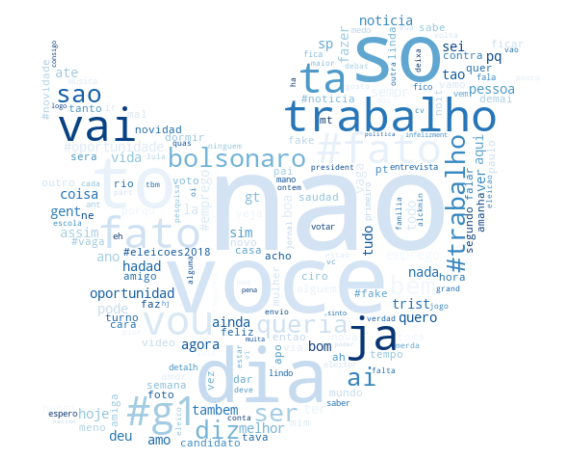

In [49]:
plot_wordcloud("masks/twitter.png",words_and_hashtags,'Blues')

### Dividido por sentimento

#### Hashtags



Sentimento: 0


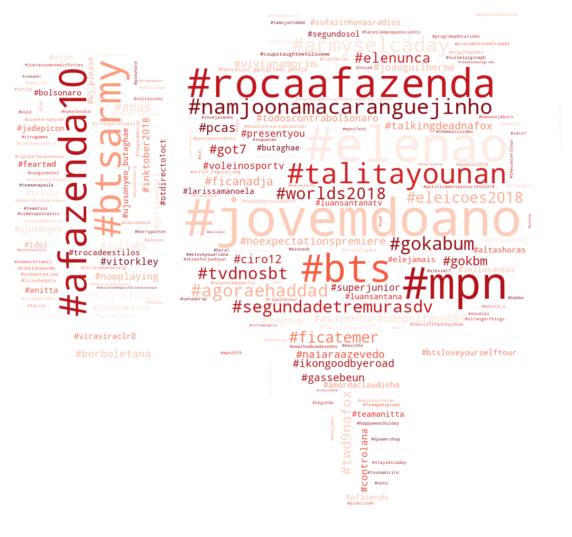



Sentimento: 1


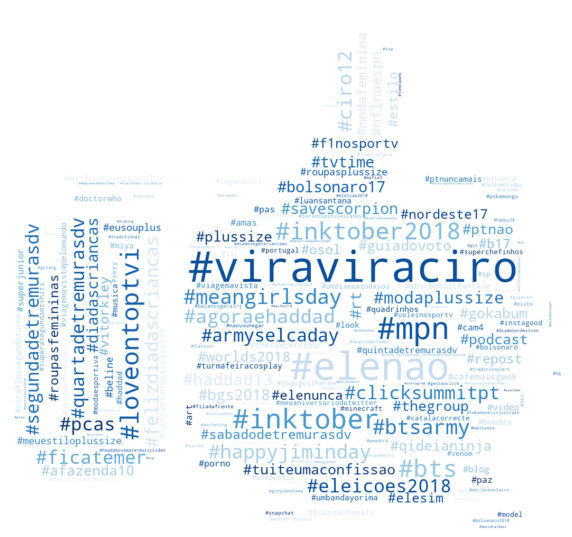



Sentimento: 2


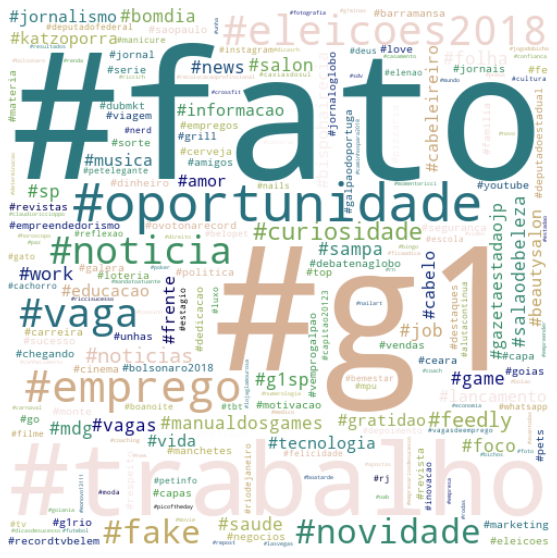

In [50]:
hashtags = [hashtag_vocabulary_0,hashtag_vocabulary_1,hashtag_vocabulary_2]
masks = ["masks/dislike.png","masks/like.png",None]
colors = ["Reds","Blues","gist_earth"]

for i,hashtag in enumerate(hashtags):
    print('\n\nSentimento:',i)
    plot_wordcloud(masks[i],hashtag,colors[i])

#### Palavras



Sentimento: 0


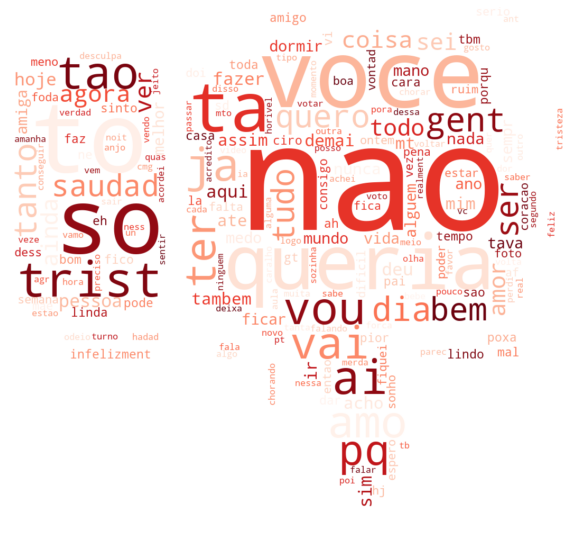



Sentimento: 1


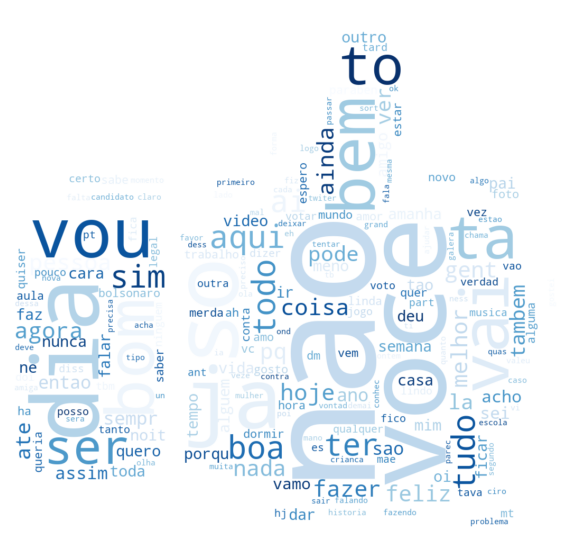



Sentimento: 2


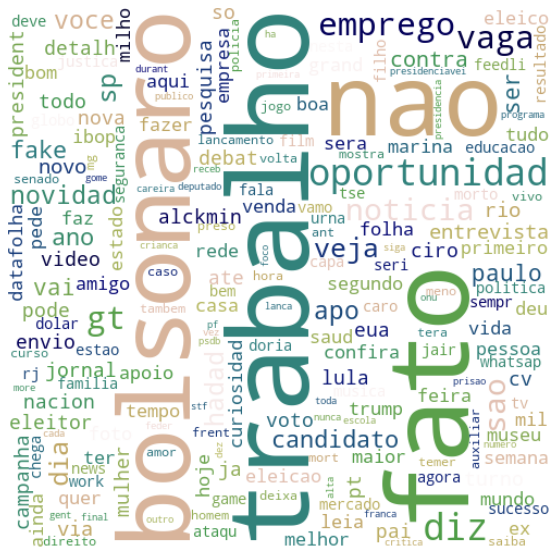

In [51]:
words = [word_vocabulary_0,word_vocabulary_1,word_vocabulary_2]
masks = ["masks/dislike.png","masks/like.png",None]
colors = ["Reds","Blues","gist_earth"]

for i,word in enumerate(words):
    print('\n\nSentimento:',i)
    plot_wordcloud(masks[i],word,colors[i])

## Stop Words

Vamos analisar o desempenho do modelo com  e sem as stop words (sem os emoticons)

In [52]:
X_labels = ['Retirando as Stop Words',
            'Mantendo as Stop Words']

X_list = []
#Retirando as Stop Words
df["pre_processing"] = df['tweet_text'].apply(lambda x: preprocessing_no_singleton(x, remove_stopwords = True))
df_pre = pd.concat([df,pd.DataFrame(df["pre_processing"].tolist(), columns = ['clean_tweet','emoj','emot','hashtags'])],axis=1)
df_pre.drop(columns = 'pre_processing', inplace=True)
X_list.append(df_pre[['clean_tweet','hashtags','emoj']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))

#Mantendo as Stop Words
df["pre_processing"] = df['tweet_text'].apply(lambda x: preprocessing_no_singleton(x, remove_stopwords = False))
df_pre = pd.concat([df,pd.DataFrame(df["pre_processing"].tolist(), columns = ['clean_tweet','emoj','emot','hashtags'])],axis=1)
df_pre.drop(columns = 'pre_processing', inplace=True)
X_list.append(df_pre[['clean_tweet','hashtags','emoj']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))


In [53]:
def test_corpus(model, X_labels, X_list, y):
    for i, X in enumerate(X_list):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.3, 
                                                            random_state = 42,
                                                            stratify=y)
        cv = CountVectorizer()

        X_train_cv = cv.fit_transform(X_train)
        X_test_cv = cv.transform(X_test)
        
        model.fit(X_train_cv, y_train)
        y_predict = model.predict(X_test_cv)
        print("Corpus     : %s" % X_labels[i])
        print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("======================")

In [54]:
y = df['sentiment']

model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )

test_corpus(model, X_labels, X_list, y)

Corpus     : Retirando as Stop Words
Accuracy   : 0.8023 
Precision  : 0.8041 
Recall     : 0.8023 
F1 - Score : 0.8031 
Corpus     : Mantendo as Stop Words
Accuracy   : 0.8112 
Precision  : 0.8121 
Recall     : 0.8112 
F1 - Score : 0.8117 


Esse resultado é corroborado pelo seguinte estudo:
 - On Stopwords, Filtering and Data Sparsity for Sentiment Analysis of Twitter  
 (http://www.lrec-conf.org/proceedings/lrec2014/pdf/292_Paper.pdf)

"Regarding the use of dynamic methods,
stoplists generated by mutual information produce the highest increase in the classifier’s performance compared to not
removing stopwords (1.78% and 2.54% average increase
in accuracy and F-measure respectively) but a moderate
reduction on the feature space and with no impact on the
data sparsity. On the other hand, removing singleton words
(those words appearing only once in the corpus) maintain a
high classification performance while shrinking the feature
space by 65% and reducing the dataset sparsity by 0.37%
on average."

Então, vamos manter as stop words e retirar apenas as palavras de ocorrência única (singleton words), que correspondem a mais de 40% das palavras totais.

# Elementos do tweet

Separamos os tweets em 4 elementos: frase, emoji, emoticon e hashtags

## Investigando a influência de cada um dos elementos

Usando a regressão logística e o count vectorize, vamos ver como cada elemento do tweete influencia no desempenho do modelo

In [55]:
X_labels = ['Só o texto',
            'texto + hashtags', 
            'texto + emoji', 
            'texto + emoji + hashtags', 
            'texto + emoticon', 
            'todos juntos',
            'sem o texto']

X_list = []
#Só o texto
X_list.append(df_pre['clean_tweet'].map(lambda x: ' '.join(x)))
#texto + hashtags
X_list.append(df_pre[['clean_tweet','hashtags']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))
#texto + emoji
X_list.append(df_pre[['clean_tweet','emoj']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))
#texto + emoji + hashtags
X_list.append(df_pre[['clean_tweet','hashtags','emoj']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))
#texto + emoticon
X_list.append(df_pre[['clean_tweet','emot']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))
#todos juntos
X_list.append(df_pre[['clean_tweet','emoj','emot','hashtags']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))
#sem o texto
X_list.append(df_pre[['emoj','emot','hashtags']].sum(axis = 1).map(lambda x:list(filter(None,x))).map(lambda x: ' '.join(x)))

In [56]:
X = df['pre_processing']
y = df['sentiment']

model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )

test_corpus(model, X_labels, X_list, y)

Corpus     : Só o texto
Accuracy   : 0.8052 
Precision  : 0.8059 
Recall     : 0.8052 
F1 - Score : 0.8055 
Corpus     : texto + hashtags
Accuracy   : 0.8106 
Precision  : 0.8115 
Recall     : 0.8106 
F1 - Score : 0.8110 
Corpus     : texto + emoji
Accuracy   : 0.8054 
Precision  : 0.8060 
Recall     : 0.8054 
F1 - Score : 0.8057 
Corpus     : texto + emoji + hashtags
Accuracy   : 0.8112 
Precision  : 0.8121 
Recall     : 0.8112 
F1 - Score : 0.8117 
Corpus     : texto + emoticon
Accuracy   : 0.9830 
Precision  : 0.9831 
Recall     : 0.9830 
F1 - Score : 0.9830 
Corpus     : todos juntos
Accuracy   : 0.9849 
Precision  : 0.9850 
Recall     : 0.9849 
F1 - Score : 0.9849 
Corpus     : sem o texto
Accuracy   : 0.9364 
Precision  : 0.9461 
Recall     : 0.9364 
F1 - Score : 0.9364 


Como podemos observar, se utilizarmos os emoticons, podemos desprezar o próprio texto que o modelo consegue classificar com mais de 90% de acurácia.

Isso se deve ao fato das querys utilizadas para montar o dataset terem sido os próprios emoticons.

Isso levanta uma questão importante: será que o modelo fica viciado em apenas reconhecer os tweets com emoticons?

Vamos investigar isso a seguir.

### Inspecionando o desempenho de cada classe

##### treinando sem os emoticons

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      9435
           1       0.72      0.73      0.73      9384
           2       0.97      0.96      0.96      9437

    accuracy                           0.81     28256
   macro avg       0.81      0.81      0.81     28256
weighted avg       0.81      0.81      0.81     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

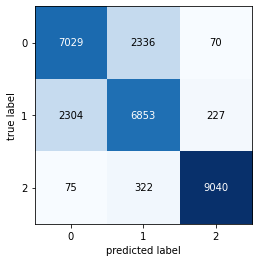

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_list[3],
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify=y)

model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

Provavelmente, esse alto desempenho da classe 2 está relecionado ao viés das querys presentes no texto.

##### treinando com os emoticons

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9435
           1       0.98      0.98      0.98      9384
           2       0.97      0.98      0.98      9437

    accuracy                           0.98     28256
   macro avg       0.98      0.98      0.98     28256
weighted avg       0.98      0.98      0.98     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

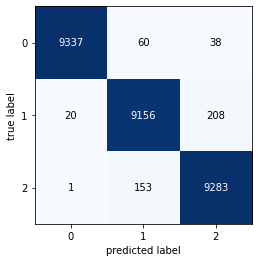

In [58]:
X_train_emot, X_test_emot, y_train, y_test = train_test_split(X_list[4],
                                                              y, 
                                                              test_size = 0.3, 
                                                              random_state = 42,
                                                              stratify=y)

model_emot = LogisticRegression(random_state = random_seed, 
                                solver = 'lbfgs',
                                max_iter=1000
                               )

cv_emot = CountVectorizer()
X_train_cv_emot = cv_emot.fit_transform(X_train_emot)
X_test_cv_emot = cv_emot.transform(X_test_emot)

model_emot.fit(X_train_cv_emot, y_train)
y_pred = model_emot.predict(X_test_cv_emot)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

## Será que o modelo treinado com os emoticons está viciado?

Vamos ver o desempenho do modelo treinado sem os emoticons para identificar os tweets sem emoticons

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      9435
           1       0.70      0.76      0.73      9384
           2       0.96      0.90      0.93      9437

    accuracy                           0.80     28256
   macro avg       0.81      0.80      0.81     28256
weighted avg       0.81      0.80      0.81     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

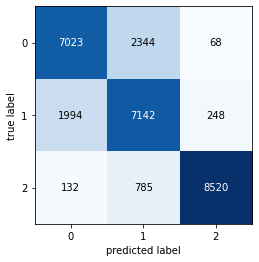

In [59]:
#modelo treinado sem os emoticons (model), 
#predizendo tweets com emoticons(cv.transform(X_test_emot))
y_pred = model.predict(cv.transform(X_test_emot))

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

Agora vamos ver o desempenho do modelo treinado com os emoticons para identificar os tweets sem emoticons

              precision    recall  f1-score   support

           0       0.88      0.02      0.04      9435
           1       0.49      0.88      0.63      9384
           2       0.84      0.99      0.91      9437

    accuracy                           0.63     28256
   macro avg       0.74      0.63      0.52     28256
weighted avg       0.74      0.63      0.52     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

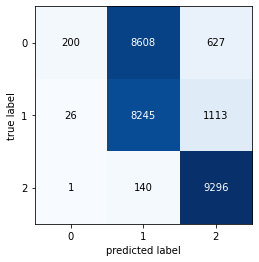

In [60]:
#modelo treinado com os emoticons (model_emot), 
#predizendo tweets sem emoticons(cv_emot.transform(X_test))
y_pred = model_emot.predict(cv_emot.transform(X_test))

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

Podemos observar que, apesar de uma alta precisão e recall, o modelo treinado com os emoticons não aprende a processar o texto, mas apenas a identificar emoticons.

Vamos tentar melhorar isso filtrando uma parte dos emoticons. Com base nas palavas que mais aparecem, vamos definir a quantidade de tweets com emoticons que farão parte do corpus (algo entre mil e 5mil) e vamos filtrá-los aleatoriamente. Para o modelo conseguir entender tweets com e sem emoticons.

### Construindo a nova base de treino

#### Identificando os tweets com emoticons

In [63]:
all_emots = list(set(emot_dict.values()))
#all_emots.remove('')
print(all_emots)

['wink', 'shock', 'baby', 'shame', 'crying', 'waving', 'drunk', 'bored', 'angel', 'cool', 'confusion', 'snubbed', 'joyful', 'skeptical', 'sadness', 'dismay', 'looking', 'laughing', 'dissatisfied', 'eyeglasses', 'ultraman', 'surprise', 'happy', 'sealed', 'frown', 'being', 'yawn', 'worried', 'straight', 'cat', 'evil', 'kiss', 'troubled', 'laughing,cheerful', 'headphones,listening', 'excited', 'surpised', 'nervous', 'giggling', 'confused', 'amazed', 'dump', 'horror', 'tongue-in-cheek', 'tears', 'sad', 'normal', 'surprised', 'party', 'embarrassed', 'tired', 'sleeping', 'tongue', 'disgust', 'kowtow']


In [64]:
#verifica se existe um emoji no tweet
emoticon_presence = X_train_emot.str.split(' ').map(
    lambda x: True  if set(x).intersection(set(all_emots))
                    else False
)
emoticon_presence

29034     True
83185     True
70025    False
4962     False
55637    False
         ...  
24237    False
87126     True
80781    False
20105    False
55604     True
Length: 65928, dtype: bool

In [65]:
emoticon_presence.sum()

39790

#### Filtrando uma parte dos tweets com os emoticons

In [66]:
#filtra emoticons de 10% dos tweets
emoticon_filter = (emoticon_presence) & (random.choices([True,False], weights=[10,90],k=len(X_train_emot)))

In [67]:
np.array(emoticon_filter).sum()

3893

Teremos 3893 tweets com emoticons

Balanceamento dos tweets com emoticons

In [69]:
y_train[emoticon_filter].value_counts()

0    2129
1    1756
2       8
Name: sentiment, dtype: int64

#### Construindo a nova base de teste com 3893 tweets com emoticons

In [75]:
def filter_emoticon(df,df_emoticon,n):
    emoticon_filter = random.choices([True,False], weights=[n,100-n],k=len(df))
    df_filtered = df
    df_filtered[emoticon_filter] = df_emoticon
    return df_filtered

In [76]:
X_train_mixed = filter_emoticon(X_train,X_train_emot,10)
X_train_mixed

29034    meia noit eu chorando vendo essa imagen linda ...
83185    que facada eu tive muita sort se tivess que pa...
70025    crianca mostra reducao no efeito da dislexia c...
4962     gt jose marcio camargo do mdb sera sabatinado ...
55637    degradado falso casarao do marqu de paranagua ...
                               ...                        
24237    saiu critica do film para todo os garoto que j...
87126    meu insta nao quer mai isso consequencia do me...
80781    oportunidad fiqu por dentro da vaga de emprego...
20105    paulinho da viola atica fidalgo filosofo do sa...
55604                          vai num medico ant que pior
Length: 65928, dtype: object

#### Treinando o modelo com essa nova base

In [77]:
model_mixed = LogisticRegression(random_state = random_seed, 
                                solver = 'lbfgs',
                                max_iter=1000
                               )

cv_mixed = CountVectorizer()
#base de treino misturada, com e sem emoticons
X_train_cv_mixed = cv_mixed.fit_transform(X_train_mixed)

#base de teste, com emoticons
X_test_cv_mixed_emot = cv_mixed.transform(X_test_emot)

#base de teste, sem emoticons
X_test_cv_mixed = cv_mixed.transform(X_test)

model_mixed.fit(X_train_cv_mixed, y_train);

##### Desempenho na base com emoticons:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9435
           1       0.94      0.95      0.94      9384
           2       0.99      0.94      0.96      9437

    accuracy                           0.96     28256
   macro avg       0.96      0.96      0.96     28256
weighted avg       0.96      0.96      0.96     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

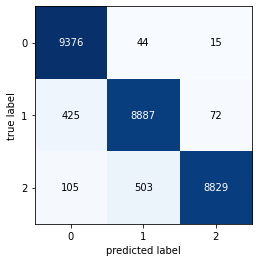

In [78]:
y_pred = model_mixed.predict(X_test_cv_mixed_emot)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

##### Desempenho na base sem emoticons:

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      9435
           1       0.72      0.73      0.72      9384
           2       0.96      0.96      0.96      9437

    accuracy                           0.81     28256
   macro avg       0.81      0.81      0.81     28256
weighted avg       0.81      0.81      0.81     28256



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

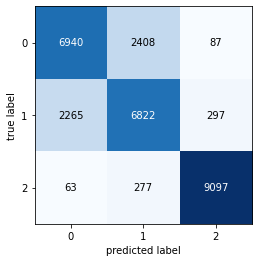

In [79]:
y_pred = model_mixed.predict(X_test_cv_mixed)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

Como podemos observar, apesar de ter o resultado um pouco pior para a base com emoticons, o modelo agora é capaz de identificar tweets com e sem emoticons, tendo um bom desempenho nas duas bases.

## Função de pré processamento

Então, definiremos a função de pré processamento com as seguintes características:
- vai deixar as hastags e emojis e emoticons
- não vai retirar as stopwords
- vai remover as palavras de ocorrência única

Obs.: 90% dos emoticons serão retirados apenas na base de treino

In [80]:
# 19
stemmer = PorterStemmer()
emot_obj = emot.core.emot() 

def preprocessing_func(string, remove_stopwords = False, include_emoticon = True):
    #tudo em minúscula
    string = string.lower()
    
    #removendo links
    string     = re.sub('\S*(http|www|.com|.net|.br|.gov)\S*', '', string)
    
    #pegando os emojis (ignorando repetições)
    emoji_list = emoji.demojize(' '.join(emoji.core.distinct_emoji_lis(string))).replace(':','').split(' ')

    #pegando os emoticons
    emot_list  = pd.Series(EMOTICON_RE.findall(string),dtype='object')
    #transformando o emoticon em uma palavra
    emot_list = emot_list.map(lambda x: emot_dict[x]).to_list()
    
    #removendo acentuação
    string = unidecode(string)
    
    #removendo menções
    string = re.sub('@[A-Za-z0-9_]*', '', string)
    
    #separando as hashtags
    hashtags = re.findall(r'\B#\w*[a-zA-Z]+\w*',string)
    
    # Removendo dígitos e qualquer palavra com um número no meio
    string = re.sub(r'\S*[\d]\S*', ' ', string)
    
    # Remove caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    
    #removendo 2 ou mais letras repetidas, exceto e, o ou s
    string = re.sub(r'((?![EeOoSs])[A-Za-z])(\1+)', r'\1', string)
    
    #removendo 3 ou mais letras repetidas apenas e, o ou s
    string = re.sub(r'([EeOoSs])\1(\1+)', r'\1', string)
    
    #removendo palavras de uma letra apenas (exceto pela letra n)
    string = re.sub(r'\b(?![nN])\w\b', '', string).strip(' ')
    #substituindo um n sozinho por não
    string = re.sub(r'\bn\b', 'nao', string)
    
    #substituindo vc por voce
    string = re.sub(r'\bvc\b', 'voce', string)
    
    #removendo 2 ou mais espaços juntos
    string = re.sub(r'([\s])(\1+)', r'\1', string)    
    
    tokens = word_tokenize(string)

    # Remover stopwords
    if remove_stopwords:
        filtered_words = [word for word in tokens if word not in stopwords_pt.union(my_stop_words) ]
    else:
        filtered_words = [word for word in tokens if word not in my_stop_words ]

    # stemming words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)

    #optamos por fazer essa remoção no próprio modelo
    #retirando as palavras que só aparecem uma vez
    #stem_words = [word for word in stem_words if word not in singleton_stems]

    corpus_line = ''

    if include_emoticon:
        for elemento in [stem_words,emoji_list,emot_list,hashtags]:
            #adiciona um espaço entre um elemento e outro
            #print(elemento)
            if elemento != ['']: corpus_line += ' '        
            #concatena o conteúdo do elemento em uma só string
            corpus_line += ' '.join(elemento)
    else:
        for elemento in [stem_words,emoji_list,hashtags]:
            #adiciona um espaço entre um elemento e outro
            #print(elemento)
            if elemento != ['']: corpus_line += ' '        
            #concatena o conteúdo do elemento em uma só string
            corpus_line += ' '.join(elemento)

    return corpus_line.strip(' ')

## Corpus

In [81]:
%%time
df["pre_processing_emot"] = df['tweet_text'].apply(lambda x: preprocessing_func(x,
                                                                                remove_stopwords = False, 
                                                                                include_emoticon = True))
df["pre_processing_no_emot"] = df['tweet_text'].apply(lambda x: preprocessing_func(x,
                                                                                   remove_stopwords = False,
                                                                                   include_emoticon = False))

Wall time: 1min 12s


In [82]:
df.head()

,id,tweet_text,tweet_date,sentiment,query_used,day_name,month_name,week_of_year,day,hour,pre_processing,pre_processing_emot,pre_processing_no_emot
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha,Tuesday,October,41,9,18,"[[rio, eleg, maior, bancada, polici, de, sua, ...",rio eleg maior bancada polici de sua historia,rio eleg maior bancada polici de sua historia
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(,Sunday,September,39,30,4,"[[fiquei, tao, trist, quando, eu, vi, preco, d...",fiquei tao trist quando eu vi preco da camera ...,fiquei tao trist quando eu vi preco da camera
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame,Monday,September,38,17,17,"[[para, theresa, may, seu, plano, para, unica,...",para theresa may seu plano para unica opcao,para theresa may seu plano para unica opcao
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(,Tuesday,October,40,2,1,"[[caralho, eu, quero, proteg, dani, em, um, po...",caralho eu quero proteg dani em um pote tadinh...,caralho eu quero proteg dani em um pote tadinha
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:),Wednesday,October,40,3,3,"[[viva, cao], [], [happy], []]",viva cao happy,viva cao


Tweets sem nenhuma palavra significativa após o pré processamento:

In [83]:
mask_null_tweets = df["pre_processing_no_emot"] == ''
mask_null_tweets.sum()

824

Sentimento desses tweets

In [84]:
df.loc[mask_null_tweets,'sentiment'].value_counts()

1    464
0    317
2     43
Name: sentiment, dtype: int64

Removendo tweets vazios

In [85]:
df.shape

(94184, 13)

In [86]:
mask_null_tweets = df["pre_processing_no_emot"] == ''
df = df[~mask_null_tweets]

In [87]:
df.reset_index(drop = True,  inplace = True)
df.shape

(93360, 13)

# Modelos

## CountVectorizer

In [88]:
X = df[['pre_processing_no_emot','pre_processing_emot']]
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify=y)

In [89]:
X_train.head()

,pre_processing_no_emot,pre_processing_emot
78318,pra mim democracia sempr foi algo tao obvio ta...,pra mim democracia sempr foi algo tao obvio ta...
42451,ca seu orcamento via whatsap pernambuco caruar...,ca seu orcamento via whatsap pernambuco caruar...
55166,ma quando ela chegar vou la dar meu view,ma quando ela chegar vou la dar meu view happy
38775,listen ouca escucha sabadodetremurasdv saturda...,listen ouca escucha sabadodetremurasdv saturda...
57659,conseguist concretizar algun objetivo est ano nao,conseguist concretizar algun objetivo est ano ...


In [90]:
#sem emoticon
sem_emot = X_train.iloc[:,0]
#com emoticon
com_emot = X_train.iloc[:,1]
#deixa passar apenas 10% dos emoticons para o modelo aprender com o texto também
X_train = filter_emoticon(sem_emot,com_emot,10)

#sem emoticon
X_test_sem_emot = X_test.iloc[:,0]
#com emoticon
X_test = X_test.iloc[:,1]

In [91]:
cv = CountVectorizer()#(max_features =1000,max_df = 0.9999, min_df = 0.0001)

In [92]:
y.value_counts()

2    31413
0    31131
1    30816
Name: sentiment, dtype: int64

In [93]:
#usando float para poder rodar na GPU com o LightGBM. Não interfere nos outros modelos

#base de treino com 10% dos emoticons
X_train_cv = cv.fit_transform(X_train).astype('float')

#base de teste original (com todos os emoticons)
X_test_cv = cv.transform(X_test).astype('float')

#base de teste sem nenhum emoticon
X_test_cv_sem_emot = cv.transform(X_test_sem_emot).astype('float')

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9339
           1       0.97      0.94      0.95      9245
           2       0.99      0.96      0.98      9424

    accuracy                           0.97     28008
   macro avg       0.97      0.97      0.97     28008
weighted avg       0.97      0.97      0.97     28008



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

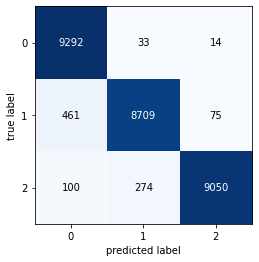

In [94]:
model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )

model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

Confirmando o desempenho a base sem emoticons

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      9339
           1       0.73      0.72      0.72      9245
           2       0.96      0.96      0.96      9424

    accuracy                           0.81     28008
   macro avg       0.81      0.81      0.81     28008
weighted avg       0.81      0.81      0.81     28008



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

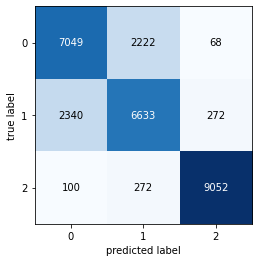

In [95]:
model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )

model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv_sem_emot)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)

### Reduzindo o espaço da matriz de palavras:

Essa análise só faz sentido para a base sem emoticons (pois com os emoticons fica tudo em 98% e não precisaria de muitas palavras)

CountVectorizer original: 44 mil colunas

In [96]:
X_train_cv.shape

(65352, 43559)

Vamos filtrar as palavras que só aparecem n vezes

In [97]:
n_list = [0,1,2,5,10,20,100]

In [98]:
X_train_cv_array = []
X_test_cv_array = []
cv_mask_array = []
for n in n_list:
    mask = np.array(X_train_cv.sum(axis=0) > n)[0]
    cv_mask_array.append(mask)
    X_train_cv_array.append(X_train_cv[:,mask])
    X_test_cv_array.append(X_test_cv_sem_emot[:,mask])

In [99]:
features_size = []
for i,train in enumerate(X_train_cv_array):
    features_size.append(train.shape[1])

In [100]:
pd.DataFrame([n_list,features_size],index =['n','features']).T

,n,features
0,0,43559
1,1,23706
2,2,16219
3,5,9628
4,10,6139
5,20,3706
6,100,950


Ou seja, originalmente tínhamos mais de 44 mil palavras. Ao remover as palavras que só aparecem uma vez, reduzimos para pouco mais de 20 mil palavras. Removendo as palavas que aparecem 10 vezes ou menos, ficamos com apenas 6 mil palavras, das 44 mil originais (e assim por diante, até n=100).

In [101]:
def test_cv_reduction(model, n_list, features_size, X_train_cv_array, X_test_cv_array, y):
    for i, X_train in enumerate(X_train_cv_array):
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test_cv_array[i])
        print("n          : %s" % n_list[i])
        print("Features   : %s" % features_size[i])
        print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("======================")

#### Redução de features para LogisticRegression

In [102]:
model = LogisticRegression(random_state = random_seed, 
                           solver = 'lbfgs',
                           max_iter=1000
                          )
test_cv_reduction(model,n_list, features_size, X_train_cv_array, X_test_cv_array, y)

n          : 0
Features   : 43559
Accuracy   : 0.8117 
Precision  : 0.8119 
Recall     : 0.8117 
F1 - Score : 0.8118 
n          : 1
Features   : 23706
Accuracy   : 0.8108 
Precision  : 0.8111 
Recall     : 0.8108 
F1 - Score : 0.8109 
n          : 2
Features   : 16219
Accuracy   : 0.8110 
Precision  : 0.8113 
Recall     : 0.8110 
F1 - Score : 0.8111 
n          : 5
Features   : 9628
Accuracy   : 0.8092 
Precision  : 0.8095 
Recall     : 0.8092 
F1 - Score : 0.8093 
n          : 10
Features   : 6139
Accuracy   : 0.8067 
Precision  : 0.8070 
Recall     : 0.8067 
F1 - Score : 0.8068 
n          : 20
Features   : 3706
Accuracy   : 0.8033 
Precision  : 0.8039 
Recall     : 0.8033 
F1 - Score : 0.8035 
n          : 100
Features   : 950
Accuracy   : 0.7862 
Precision  : 0.7872 
Recall     : 0.7862 
F1 - Score : 0.7863 


#### Redução de features para LGBM

In [103]:
model = LGBMClassifier(**LGBM_gpu,random_state = random_seed)
test_cv_reduction(model,n_list, features_size, X_train_cv_array, X_test_cv_array, y)

n          : 0
Features   : 43559
Accuracy   : 0.7923 
Precision  : 0.7922 
Recall     : 0.7923 
F1 - Score : 0.7917 
n          : 1
Features   : 23706
Accuracy   : 0.7923 
Precision  : 0.7922 
Recall     : 0.7923 
F1 - Score : 0.7917 
n          : 2
Features   : 16219
Accuracy   : 0.7923 
Precision  : 0.7922 
Recall     : 0.7923 
F1 - Score : 0.7917 
n          : 5
Features   : 9628
Accuracy   : 0.7923 
Precision  : 0.7922 
Recall     : 0.7923 
F1 - Score : 0.7917 
n          : 10
Features   : 6139
Accuracy   : 0.7923 
Precision  : 0.7922 
Recall     : 0.7923 
F1 - Score : 0.7917 
n          : 20
Features   : 3706
Accuracy   : 0.7928 
Precision  : 0.7926 
Recall     : 0.7928 
F1 - Score : 0.7921 
n          : 100
Features   : 950
Accuracy   : 0.7843 
Precision  : 0.7841 
Recall     : 0.7843 
F1 - Score : 0.7836 


##### Usando os parâmetros  do LGBM baseados no teste de benchmark

In [104]:
model = LGBMClassifier(**LGBM_gpu,random_state = random_seed, **LGBM_benchmark)

test_cv_reduction(model,n_list, features_size, X_train_cv_array, X_test_cv_array, y)

n          : 0
Features   : 43559
Accuracy   : 0.8200 
Precision  : 0.8205 
Recall     : 0.8200 
F1 - Score : 0.8200 
n          : 1
Features   : 23706
Accuracy   : 0.8200 
Precision  : 0.8205 
Recall     : 0.8200 
F1 - Score : 0.8200 
n          : 2
Features   : 16219
Accuracy   : 0.8200 
Precision  : 0.8205 
Recall     : 0.8200 
F1 - Score : 0.8200 
n          : 5
Features   : 9628
Accuracy   : 0.8200 
Precision  : 0.8205 
Recall     : 0.8200 
F1 - Score : 0.8200 
n          : 10
Features   : 6139
Accuracy   : 0.8200 
Precision  : 0.8205 
Recall     : 0.8200 
F1 - Score : 0.8200 
n          : 20
Features   : 3706
Accuracy   : 0.8189 
Precision  : 0.8194 
Recall     : 0.8189 
F1 - Score : 0.8189 
n          : 100
Features   : 950
Accuracy   : 0.8022 
Precision  : 0.8023 
Recall     : 0.8022 
F1 - Score : 0.8020 


É interessante notar como o LGBM consegue um excelente desempenho, mesmo com menos de mil palavras.

#### Conclusões da redução de features

- Podemos perceber que, com apenas mil das 44 mil palavras iniciais é é possível fazer uma boa predição (dada a baixa variedade do vacabulário utilizado nos tweets).

- Retirar as stopwords degrada a predição. melhor manter as stop words e retirar as palavras que aparecem poucas vezes no corpus. (isso foi visto na prática e corroborado pelo estudo).

Optamos por n = 2 (16293 palavras). Reduzindo a esparsidade e o espaço da matriz, sem degradar a predição.

### Testando diferentes modelos para ver se algum se destaca

Todas as análises serão feitas para a base sem os emoticons, que é onde os modelos encontram dificuldades. (Lembrando que os modelos são treinados com a base com 10% dos emoticons)

In [105]:
def test_models(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Model: %s" % mdl[col_model_name])
        print(classification_report(y_test, y_pred))
        print("="*55)

In [106]:
list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed,
                                  max_iter=5000,
                                  solver = 'lbfgs')},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state = random_seed,**XGBoost_warning)},
{'model_name': 'LightGBM',
 'estimator' : LGBMClassifier(**LGBM_gpu,**LGBM_benchmark,random_state = random_seed)},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

In [107]:
test_models(list_models,
            "model_name",
            "estimator",
            X_train_cv,
            X_test_cv_sem_emot,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      9339
           1       0.73      0.72      0.72      9245
           2       0.96      0.96      0.96      9424

    accuracy                           0.81     28008
   macro avg       0.81      0.81      0.81     28008
weighted avg       0.81      0.81      0.81     28008

Model: XGBoost
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      9339
           1       0.66      0.73      0.69      9245
           2       0.92      0.94      0.93      9424

    accuracy                           0.78     28008
   macro avg       0.78      0.77      0.77     28008
weighted avg       0.78      0.78      0.78     28008

Model: LightGBM
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      9339
           1       0.72      0.76      0.74      9245
           2     

### Cross Validation do CountVectorize

Utilizando a base com 10% dos emoticons

In [108]:
#Constantes para acessar os modelos
logreg_ = 0
lgbm_   = 2

In [109]:
list_models[logreg_]['estimator']

LogisticRegression(max_iter=5000, random_state=42)

In [110]:
list_models[lgbm_]['estimator']

LGBMClassifier(device='gpu', learning_rate=0.05, max_bin=63, n_estimators=500,
               num_leaves=127, random_state=42, tree_learner='voting',
               verbose=-1)

In [111]:
scores = cross_validate(list_models[logreg_]['estimator'],
                        X_train_cv, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [112]:
model_metrics = pd.DataFrame(scores).describe().T
model_metrics

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,7.909629,0.296707,7.426746,7.679599,8.068263,8.073446,8.200561
score_time,10.0,0.005404,0.000517,0.005003,0.005004,0.005004,0.006004,0.006005
test_precision_macro,10.0,0.829369,0.005293,0.820414,0.827092,0.829593,0.833605,0.835842
test_recall_macro,10.0,0.828905,0.005458,0.820086,0.826958,0.828392,0.832837,0.836041
test_f1_macro,10.0,0.829093,0.005367,0.820226,0.826981,0.828911,0.833187,0.835884


In [307]:
scores = cross_validate(list_models[lgbm_]['estimator'],
                        X_train_cv, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [342]:
model_metrics = dict()

In [343]:
model_metrics['LGBM_CV'] = pd.DataFrame(scores).describe().T
model_metrics['LGBM_CV']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,10.824331,0.374852,10.369419,10.582361,10.752266,11.008999,11.546488
score_time,10.0,0.211392,0.010611,0.202184,0.205436,0.206688,0.213444,0.233212
test_precision_macro,10.0,0.830400,0.004556,0.823821,0.827293,0.830234,0.832639,0.837242
test_recall_macro,10.0,0.830114,0.004431,0.823898,0.826821,0.829910,0.832501,0.837008
test_f1_macro,10.0,0.830147,0.004445,0.823837,0.826946,0.830005,0.832462,0.837022


O LightGBM obteve um resultado levemente melhor no cross validation. Abos os modelos tiveram um desvio padrão muito baixo.

## Tf-IDF

In [337]:
#retira as palavras menos frequentes
min_df = 0.00004

tfidf = TfidfVectorizer(use_idf=True,min_df=min_df)

#base de treino com 10% dos emoticons
X_train_tfidf = tfidf.fit_transform(X_train).astype('float')

#base de teste original (com todos os emoticons)
X_test_tfidf = tfidf.transform(X_test).astype('float')

#base de teste sem nenhum emoticon
X_test_tfidf_sem_emot = tfidf.transform(X_test_sem_emot).astype('float')

Temos um vocabulário de 15540 palavras

In [339]:
X_train_tfidf.shape

(65169, 15540)

In [311]:
test_models(list_models,
            "model_name",
            "estimator",
            X_train_tfidf,
            X_test_tfidf,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9306
           1       0.97      0.98      0.98      9200
           2       0.99      0.97      0.98      9424

    accuracy                           0.98     27930
   macro avg       0.98      0.98      0.98     27930
weighted avg       0.98      0.98      0.98     27930

Model: XGBoost
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9306
           1       0.94      0.98      0.96      9200
           2       1.00      0.93      0.96      9424

    accuracy                           0.97     27930
   macro avg       0.97      0.97      0.97     27930
weighted avg       0.97      0.97      0.97     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9306
           1       0.97      0.99      0.98      9200
           2     

In [340]:
test_models(list_models,
            "model_name",
            "estimator",
            X_train_tfidf,
            X_test_tfidf_sem_emot,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      9306
           1       0.73      0.75      0.74      9200
           2       0.95      0.97      0.96      9424

    accuracy                           0.82     27930
   macro avg       0.82      0.82      0.82     27930
weighted avg       0.82      0.82      0.82     27930

Model: XGBoost
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      9306
           1       0.66      0.73      0.70      9200
           2       0.94      0.94      0.94      9424

    accuracy                           0.78     27930
   macro avg       0.78      0.78      0.78     27930
weighted avg       0.78      0.78      0.78     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      9306
           1       0.72      0.75      0.73      9200
           2     

### Cross Validation do TF-IDF

In [355]:
scores = cross_validate(list_models[logreg_]['estimator'],
                        X_train_tfidf, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [356]:
model_metrics['LOGREG_TF-IDF'] = pd.DataFrame(scores).describe().T
model_metrics['LOGREG_TF-IDF']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,3.894539,0.273841,3.579251,3.693106,3.812965,4.076203,4.378978
score_time,10.0,0.005204,0.000423,0.005001,0.005002,0.005004,0.005005,0.006005
test_precision_macro,10.0,0.833187,0.003034,0.827952,0.831704,0.832363,0.835751,0.837577
test_recall_macro,10.0,0.834115,0.002882,0.829131,0.832660,0.833486,0.836565,0.837795
test_f1_macro,10.0,0.833497,0.002878,0.828468,0.832108,0.832800,0.836025,0.837231


In [353]:
scores = cross_validate(list_models[lgbm_]['estimator'],
                        X_train_tfidf, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [349]:
model_metrics['LGBM_TF-IDF'] = pd.DataFrame(scores).describe().T
model_metrics['LGBM_TF-IDF']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,11.204177,0.494374,10.515551,10.830838,11.205677,11.544737,12.074968
score_time,10.0,0.224504,0.019085,0.204185,0.209440,0.218698,0.234963,0.261237
test_precision_macro,10.0,0.830400,0.004556,0.823821,0.827293,0.830234,0.832639,0.837242
test_recall_macro,10.0,0.830114,0.004431,0.823898,0.826821,0.829910,0.832501,0.837008
test_f1_macro,10.0,0.830147,0.004445,0.823837,0.826946,0.830005,0.832462,0.837022


Resultado do CountVectorize com LGBM para comparação.

In [350]:
model_metrics['LGBM_CV']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,10.824331,0.374852,10.369419,10.582361,10.752266,11.008999,11.546488
score_time,10.0,0.211392,0.010611,0.202184,0.205436,0.206688,0.213444,0.233212
test_precision_macro,10.0,0.830400,0.004556,0.823821,0.827293,0.830234,0.832639,0.837242
test_recall_macro,10.0,0.830114,0.004431,0.823898,0.826821,0.829910,0.832501,0.837008
test_f1_macro,10.0,0.830147,0.004445,0.823837,0.826946,0.830005,0.832462,0.837022


O melhor modelo para o TF-IDF foi o Logistic Regression, que superou, por muito pouco, o desempenho do LightGBM com o CountVectorize.

## Word to Vec

In [433]:
#Para o word2vec precisamos transformar as strings em listas
X_train_w2v = X_train.str.split(' ')
X_test_w2v  = X_test.str.split(' ')
X_test_sem_emot_w2v = X_test_sem_emot.str.split(' ')

In [421]:
#X_train_w2v = [nltk.word_tokenize(texto, language='portuguese') for texto in X_train]
#X_test_w2v  = [nltk.word_tokenize(texto, language='portuguese') for texto in X_test]
#X_test_sem_emot_w2v  = [nltk.word_tokenize(texto, language='portuguese') for texto in X_test_sem_emot]

In [436]:
for tweet in X_train_w2v[0:4]:
    print(tweet)

['oi', 'tudo', 'bem']
['gt', 'tre', 'sugesto', 'para', 'decorar', 'casa', 'para', 'receb', 'primavera']
['agr', 'eu', 'pergunto', 'vc', 'nao', 'sabem', 'usar', 'nem', 'que', 'uma', 'coisa', 'tao', 'simpl', 'ne', 'migl', 'quem', 'dira', 'uma', 'arma', 'rsr', 'poe', 'maozinha', 'na', 'consciencia', 'ai', 'da', 'tempo']
['queria', 'tanto', 'ter', 'ido', 'igreja', 'ontem', 'ma', 'tava', 'tao', 'mal', 'que', 'nem', 'deu']


In [437]:
X_test_w2v[0:4]

76810    [nao, gostaria, de, ajudar, frown]
92364        [levei, kiwi, para, la, happy]
25574        [nao, na, minha, horta, frown]
91087                  [melhor, nao, happy]
Name: pre_processing_emot, dtype: object

In [438]:
X_test_sem_emot_w2v[0:4]

76810    [nao, gostaria, de, ajudar]
92364        [levei, kiwi, para, la]
25574        [nao, na, minha, horta]
91087                  [melhor, nao]
Name: pre_processing_no_emot, dtype: object

In [468]:
w2v = Word2Vec(
    sentences=X_train_w2v, vector_size=100, min_count=2, workers=16,
)

### Testando as diferentes funções de agregação

##### Função que agrega as matrizes do word2vec

In [469]:
def w2v_agg(df,model):
    agg_m  = []
    agg_s  = []
    agg_sn = []
    
    for phrase in df:
        vecs = []
        
        for word in phrase:
            #veja se a palavra está no vocabulário
            if word in model.wv.index_to_key:
                #se estiver, pegue o vetor que descreve cada palavra
                vecs.append(model.wv.get_vector(word))
        
        #se foi encontrada alguma palavra, agregue os vetores através da soma, media e média normalizada
        if vecs:
            soma  = np.sum(vecs, axis=0)
            media = soma / len(vecs)
            soma_normalizada = soma / np.linalg.norm(soma)

            agg_m.append(media)
            agg_s.append(soma)
            agg_sn.append(soma_normalizada)

        #caso contrário, preencha com zero
        else:
            agg_m.append(np.zeros(model.vector_size))
            agg_s.append(np.zeros(model.vector_size))
            agg_sn.append(np.zeros(model.vector_size))

    agg_m  = np.array(agg_m)
    agg_s  = np.array(agg_s)
    agg_sn = np.array(agg_sn)

    return agg_m, agg_s, agg_sn

In [470]:
%%time
#agregando as matrizes atraves da média, soma e soma normalizada
X_train_w2v_m, X_train_w2v_s, X_train_w2v_sn = w2v_agg(X_train_w2v,w2v)

Wall time: 20.7 s


In [471]:
X_test_w2v_m, X_test_w2v_s, X_test_w2v_sn = w2v_agg(X_test_w2v,w2v)

In [472]:
X_test_w2v_m_sem_emot, X_test_w2v_s_sem_emot, X_test_w2v_sn_sem_emot = w2v_agg(X_test_sem_emot_w2v,w2v)

In [473]:
list_models_w2v = [list_models[logreg_],
                   list_models[lgbm_],
                   {'model_name': 'Random Forest',
                    'estimator' : RandomForestClassifier(random_state = random_seed)}, ]

#### Média

In [474]:
test_models(list_models_w2v,
            "model_name",
            "estimator",
            X_train_w2v_m,
            X_test_w2v_m_sem_emot,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      9306
           1       0.66      0.69      0.67      9200
           2       0.92      0.94      0.93      9424

    accuracy                           0.77     27930
   macro avg       0.77      0.77      0.77     27930
weighted avg       0.77      0.77      0.77     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      9306
           1       0.68      0.68      0.68      9200
           2       0.95      0.95      0.95      9424

    accuracy                           0.78     27930
   macro avg       0.78      0.78      0.78     27930
weighted avg       0.78      0.78      0.78     27930

Model: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      9306
           1       0.67      0.67      0.67      9200
           

#### Soma

In [475]:
test_models(list_models_w2v,
            "model_name",
            "estimator",
            X_train_w2v_s,
            X_test_w2v_s_sem_emot,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      9306
           1       0.67      0.68      0.67      9200
           2       0.95      0.94      0.95      9424

    accuracy                           0.78     27930
   macro avg       0.78      0.78      0.78     27930
weighted avg       0.78      0.78      0.78     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      9306
           1       0.67      0.68      0.67      9200
           2       0.96      0.96      0.96      9424

    accuracy                           0.78     27930
   macro avg       0.78      0.78      0.78     27930
weighted avg       0.78      0.78      0.78     27930

Model: Random Forest
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      9306
           1       0.66      0.66      0.66      9200
           

#### Soma Normalizada

In [477]:
test_models(list_models_w2v,
            "model_name",
            "estimator",
            X_train_w2v_sn,
            X_test_w2v_sn_sem_emot,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      9306
           1       0.65      0.63      0.64      9200
           2       0.90      0.93      0.92      9424

    accuracy                           0.75     27930
   macro avg       0.75      0.75      0.75     27930
weighted avg       0.75      0.75      0.75     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      9306
           1       0.68      0.68      0.68      9200
           2       0.95      0.95      0.95      9424

    accuracy                           0.78     27930
   macro avg       0.78      0.78      0.78     27930
weighted avg       0.78      0.78      0.78     27930

Model: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      9306
           1       0.66      0.66      0.66      9200
           

Não houve uma diferença muito grande entre as funções de agregação dos vetores. A média foi um pouco melhor.

O word2vec teve um desempenho pior do que o CountVectorize e o TF-IDF para a detecção de tweets sem emoji.

### Cross validation do word2vec

In [478]:
scores = cross_validate(list_models[lgbm_]['estimator'],
                        X_train_w2v_m, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [479]:
model_metrics['LGBM_W2V'] = pd.DataFrame(scores).describe().T
model_metrics['LGBM_W2V']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,48.450893,2.288806,43.602112,47.328081,48.401112,49.864273,51.716245
score_time,10.0,0.077447,0.012177,0.065059,0.068312,0.074067,0.084663,0.097170
test_precision_macro,10.0,0.787258,0.004702,0.781055,0.783100,0.787665,0.791226,0.793274
test_recall_macro,10.0,0.788040,0.004794,0.781775,0.783354,0.788290,0.792256,0.794386
test_f1_macro,10.0,0.787626,0.004742,0.781500,0.783205,0.787948,0.791717,0.793802


## Doc to Vec

In [481]:
def tag_lines(lines):
    tagged_lines = []
    for i, line in enumerate(lines):
        tagged_lines.append(doc2vec.TaggedDocument(line, [i]))
    return tagged_lines

In [482]:
train_corpus = tag_lines(X_train_w2v)
test_corpus  = X_test_sem_emot_w2v

In [483]:
train_corpus[0:4]

[TaggedDocument(words=['oi', 'tudo', 'bem'], tags=[0]),
 TaggedDocument(words=['gt', 'tre', 'sugesto', 'para', 'decorar', 'casa', 'para', 'receb', 'primavera'], tags=[1]),
 TaggedDocument(words=['agr', 'eu', 'pergunto', 'vc', 'nao', 'sabem', 'usar', 'nem', 'que', 'uma', 'coisa', 'tao', 'simpl', 'ne', 'migl', 'quem', 'dira', 'uma', 'arma', 'rsr', 'poe', 'maozinha', 'na', 'consciencia', 'ai', 'da', 'tempo'], tags=[2]),
 TaggedDocument(words=['queria', 'tanto', 'ter', 'ido', 'igreja', 'ontem', 'ma', 'tava', 'tao', 'mal', 'que', 'nem', 'deu'], tags=[3])]

In [484]:
test_corpus[0:4]

76810    [nao, gostaria, de, ajudar]
92364        [levei, kiwi, para, la]
25574        [nao, na, minha, horta]
91087                  [melhor, nao]
Name: pre_processing_no_emot, dtype: object

In [486]:
model = doc2vec.Doc2Vec(vector_size=200, min_count=2, epochs=20,seed = random_seed)

In [487]:
model.build_vocab(train_corpus)

In [488]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [489]:
X_train.shape

(65169,)

In [491]:
X_train_d2v = []

for phrase in X_train_w2v:
    vecs = []
    vecs.append(model.infer_vector(phrase))
    X_train_d2v.append(vecs)

X_train_d2v = np.array(X_train_d2v)
X_train_d2v = X_train_d2v[:, 0, :]


In [493]:
X_train_d2v.shape

(65169, 200)

In [492]:
X_test_d2v = []

for phrase in X_test_sem_emot_w2v:
    vecs = []
    vecs.append(model.infer_vector(phrase))
    X_test_d2v.append(vecs)
X_test_d2v = np.array(X_test_d2v)
X_test_d2v = X_test_d2v[:, 0, :]

In [494]:
X_test_d2v.shape

(27930, 200)

In [495]:
test_models(list_models_w2v,
            "model_name",
            "estimator",
            X_train_d2v,
            X_test_d2v,
            y_train,
            y_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      9306
           1       0.59      0.56      0.57      9200
           2       0.68      0.73      0.71      9424

    accuracy                           0.62     27930
   macro avg       0.62      0.62      0.62     27930
weighted avg       0.62      0.62      0.62     27930

Model: LightGBM
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      9306
           1       0.60      0.63      0.62      9200
           2       0.86      0.85      0.85      9424

    accuracy                           0.71     27930
   macro avg       0.71      0.71      0.71     27930
weighted avg       0.71      0.71      0.71     27930

Model: Random Forest
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      9306
           1       0.54      0.57      0.56      9200
           

## Conclusão dos modelos

Dos 4 modelos apresentados o que apresentou melhor desempenho foi a combinação de TD-IDF com Logistic Regression. A segunda melhor combinação foi Light GBM com CountVectorize.

In [496]:
model_metrics['LOGREG_TF-IDF']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,3.894539,0.273841,3.579251,3.693106,3.812965,4.076203,4.378978
score_time,10.0,0.005204,0.000423,0.005001,0.005002,0.005004,0.005005,0.006005
test_precision_macro,10.0,0.833187,0.003034,0.827952,0.831704,0.832363,0.835751,0.837577
test_recall_macro,10.0,0.834115,0.002882,0.829131,0.832660,0.833486,0.836565,0.837795
test_f1_macro,10.0,0.833497,0.002878,0.828468,0.832108,0.832800,0.836025,0.837231


In [497]:
model_metrics['LGBM_CV']

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,10.824331,0.374852,10.369419,10.582361,10.752266,11.008999,11.546488
score_time,10.0,0.211392,0.010611,0.202184,0.205436,0.206688,0.213444,0.233212
test_precision_macro,10.0,0.830400,0.004556,0.823821,0.827293,0.830234,0.832639,0.837242
test_recall_macro,10.0,0.830114,0.004431,0.823898,0.826821,0.829910,0.832501,0.837008
test_f1_macro,10.0,0.830147,0.004445,0.823837,0.826946,0.830005,0.832462,0.837022


# Otimização

## LightGBM

In [1065]:
metric_to_optimze = 'f1'  # accuracy, precision, recall, f1

#Cria um novo estudo (caso não tenha carregado um estudo antigo)
study_LGBM = optuna.create_study(direction='maximize')

[I 2022-03-17 20:21:15,734] A new study created in memory with name: no-name-e03411b6-be94-452b-ba84-e1e83fbfdd60


In [1064]:
def objective(trial):
    params = {
        'max_bin' : trial.suggest_int('max_bin', 10, 255, log=True),
        'tree_learner' : trial.suggest_categorical('tree_learner', ['voting']),
        'num_leaves' : trial.suggest_int('num_leaves', 10, 511, log=True),
        'n_estimators' : trial.suggest_int('n_estimators', 10, 1000, log=True),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.2, step=0.01),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 20),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 20),
        "subsample": trial.suggest_float("subsample", 0.8, 1, step=0.1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1, step=0.1)
    }

    lgbm_model = LGBMClassifier(**LGBM_gpu,random_state = random_seed,**params)

    scores = cross_validate(lgbm_model,
                            X_train_cv, 
                            y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                            cv=10)
    metric_dc = {
        'recall': scores['test_recall_macro'].mean(),
        'precision': scores['test_precision_macro'].mean(),
        'f1': scores['test_f1_macro'].mean()
    }
    return metric_dc[metric_to_optimze]

In [1067]:
%%time
study_LGBM.optimize(objective, n_trials=100)

[I 2022-03-17 20:24:44,616] Trial 4 finished with value: 0.8022994302220177 and parameters: {'max_bin': 102, 'tree_learner': 'voting', 'num_leaves': 294, 'n_estimators': 726, 'learning_rate': 0.01, 'reg_alpha': 11, 'reg_lambda': 20, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 4 with value: 0.8022994302220177.
[I 2022-03-17 20:24:48,648] Trial 5 finished with value: 0.688204774412071 and parameters: {'max_bin': 102, 'tree_learner': 'voting', 'num_leaves': 12, 'n_estimators': 23, 'learning_rate': 0.060000000000000005, 'reg_alpha': 7, 'reg_lambda': 3, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 4 with value: 0.8022994302220177.
[I 2022-03-17 20:25:27,061] Trial 6 finished with value: 0.7860010475108576 and parameters: {'max_bin': 22, 'tree_learner': 'voting', 'num_leaves': 41, 'n_estimators': 666, 'learning_rate': 0.02, 'reg_alpha': 18, 'reg_lambda': 12, 'subsample': 0.8, 'colsample_bytree': 0.9}. Best is trial 4 with value: 0.8022994302220177.
[I 2022-03-17 20

[I 2022-03-17 20:38:39,145] Trial 29 finished with value: 0.8183932359669382 and parameters: {'max_bin': 131, 'tree_learner': 'voting', 'num_leaves': 84, 'n_estimators': 155, 'learning_rate': 0.18000000000000002, 'reg_alpha': 5, 'reg_lambda': 1, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 22 with value: 0.8290706175730115.
[I 2022-03-17 20:39:10,170] Trial 30 finished with value: 0.8132422380978028 and parameters: {'max_bin': 49, 'tree_learner': 'voting', 'num_leaves': 48, 'n_estimators': 941, 'learning_rate': 0.14, 'reg_alpha': 8, 'reg_lambda': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 22 with value: 0.8290706175730115.
[I 2022-03-17 20:39:30,944] Trial 31 finished with value: 0.8289521601898373 and parameters: {'max_bin': 84, 'tree_learner': 'voting', 'num_leaves': 28, 'n_estimators': 386, 'learning_rate': 0.18000000000000002, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 22 with value: 0.8290706175730115.


[I 2022-03-17 20:55:25,956] Trial 54 finished with value: 0.8158991372352306 and parameters: {'max_bin': 117, 'tree_learner': 'voting', 'num_leaves': 33, 'n_estimators': 178, 'learning_rate': 0.17, 'reg_alpha': 4, 'reg_lambda': 2, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 42 with value: 0.8297158144617572.
[I 2022-03-17 20:55:37,610] Trial 55 finished with value: 0.8238295523794191 and parameters: {'max_bin': 67, 'tree_learner': 'voting', 'num_leaves': 20, 'n_estimators': 213, 'learning_rate': 0.18000000000000002, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 42 with value: 0.8297158144617572.
[I 2022-03-17 20:56:11,684] Trial 56 finished with value: 0.8259776827260445 and parameters: {'max_bin': 78, 'tree_learner': 'voting', 'num_leaves': 58, 'n_estimators': 373, 'learning_rate': 0.19, 'reg_alpha': 2, 'reg_lambda': 9, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 42 with value: 0.8297158144617572.
[I 2022-03-17 2

KeyboardInterrupt: 

In [ ]:
#acabei perdendo o log de otimizações, mas tenho os parâmetros salvos

In [1007]:
plot_optimization_history(study_LGBM)

In [ ]:
#{'max_bin': 12,
# 'tree_learner': 'voting',
# 'num_leaves': 383,
# 'n_estimators': 702,
# 'learning_rate': 0.08,
# 'reg_alpha': 2,
# 'reg_lambda': 19,
# 'subsample': 0.8,
# 'colsample_bytree': 0.9}

In [723]:
best_lgbm = study_LGBM.best_params
best_lgbm

{'max_bin': 12,
 'tree_learner': 'voting',
 'num_leaves': 383,
 'n_estimators': 702,
 'learning_rate': 0.08,
 'reg_alpha': 2,
 'reg_lambda': 19,
 'subsample': 0.8,
 'colsample_bytree': 0.9}

In [724]:
lgbm_model = LGBMClassifier(**best_lgbm,
                            **LGBM_gpu,
                            random_state = random_seed)

In [725]:
scores = cross_validate(lgbm_model,
                        X_train_cv, 
                        y_train,scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10)

In [726]:
pd.DataFrame(scores).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,22.860088,0.664384,22.043021,22.391838,22.765678,23.197065,24.102891
score_time,10.0,0.458417,0.027516,0.424385,0.434144,0.454913,0.475182,0.503458
test_precision_macro,10.0,0.830928,0.004918,0.826523,0.827200,0.828565,0.834058,0.841089
test_recall_macro,10.0,0.830671,0.004948,0.825959,0.827006,0.828085,0.833963,0.841021
test_f1_macro,10.0,0.830692,0.004912,0.826163,0.826983,0.828229,0.833951,0.840968


Mesmo com a otimização, o LightGBM não conseguiu superar o LogisticRegression com o TF-IDF

## LogisticRegression

In [807]:
def objective(trial):

    params = {        
        "C": trial.suggest_float("C", 0.1, 10),
        'solver': trial.suggest_categorical("solver", ['newton-cg','lbfgs','liblinear','sag','saga']),
        'max_iter' : trial.suggest_int('max_iter', 1000, 1000),
    }

    logreg = LogisticRegression(**params,random_state = random_seed)
    
    scores = cross_validate(logreg,
                            X_train_tfidf,
                            y_train,
                            scoring=['precision_macro','recall_macro','f1_macro'],
                            cv=10,
                            n_jobs=-1)

    metric_dc = {
        'recall': scores['test_recall_macro'].mean(),
        'precision': scores['test_precision_macro'].mean(),
        'f1': scores['test_f1_macro'].mean()
    }
    return metric_dc[metric_to_optimze]

In [808]:
metric_to_optimze = 'f1'  # accuracy, precision, recall, f1

#Cria um novo estudo (caso não tenha carregado um estudo antigo)
study_logreg = optuna.create_study(direction='maximize')

[I 2022-03-17 16:33:58,205] A new study created in memory with name: no-name-35ec6604-b0c8-44d9-ae3c-b4d874d41220


In [1044]:
%%time
study_logreg.optimize(objective, n_trials=100)

[I 2022-03-17 20:12:06,206] Trial 260 finished with value: 0.8345997323651682 and parameters: {'C': 0.8517116583133721, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:12:15,781] Trial 261 finished with value: 0.8346857816125967 and parameters: {'C': 1.2956346299173274, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:12:23,389] Trial 262 finished with value: 0.8336353053387434 and parameters: {'C': 0.6347757239832166, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:12:33,631] Trial 263 finished with value: 0.8343201694663126 and parameters: {'C': 1.5118094109649103, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:12:42,003] Trial 264 finished with value: 0.835116802123661 and parameters: {'C': 0.9432320472652735, 'solver': 'lbfgs', 'max_iter': 1000}. Best is tri

[I 2022-03-17 20:13:54,071] Trial 298 finished with value: 0.8337164418859903 and parameters: {'C': 0.6485921191335272, 'solver': 'sag', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:13:55,173] Trial 299 finished with value: 0.8350367152364851 and parameters: {'C': 1.1284483357066721, 'solver': 'sag', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:14:03,036] Trial 300 finished with value: 0.8345416640392921 and parameters: {'C': 0.8160379104552613, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:14:04,149] Trial 301 finished with value: 0.8346020045155613 and parameters: {'C': 1.3282390268187665, 'solver': 'sag', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:14:05,282] Trial 302 finished with value: 0.835053758991422 and parameters: {'C': 1.0188095390907044, 'solver': 'saga', 'max_iter': 1000}. Best is trial 182 

[I 2022-03-17 20:15:41,645] Trial 336 finished with value: 0.8349107241959348 and parameters: {'C': 0.9197244248410371, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:15:49,201] Trial 337 finished with value: 0.834297032652217 and parameters: {'C': 0.758887679040823, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:15:57,896] Trial 338 finished with value: 0.8350386295972443 and parameters: {'C': 1.0152033054626959, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:16:07,071] Trial 339 finished with value: 0.8348144608004766 and parameters: {'C': 1.2379505368722885, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 182 with value: 0.8351578498156252.
[I 2022-03-17 20:16:13,684] Trial 340 finished with value: 0.8336234789133578 and parameters: {'C': 0.5607686733453802, 'solver': 'lbfgs', 'max_iter': 1000}. Best is tria

Wall time: 5min 20s


In [1045]:
best_logreg = study_logreg.best_params
best_logreg

{'C': 1.9600550274157922, 'solver': 'liblinear', 'max_iter': 1000}

In [1046]:
logreg_model = LogisticRegression(random_state = random_seed,
                                  **best_logreg
                                 )

In [1047]:
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf_sem_emot)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9306
           1       0.74      0.74      0.74      9200
           2       0.95      0.98      0.96      9424

    accuracy                           0.82     27930
   macro avg       0.82      0.82      0.82     27930
weighted avg       0.82      0.82      0.82     27930



In [1048]:
scores = cross_validate(logreg_model,
                        X_train_tfidf,
                        y_train,
                        scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10,
                        n_jobs=-1)

In [1049]:
pd.DataFrame(scores).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,2.592655,0.042841,2.538303,2.561328,2.586349,2.625885,2.663418
score_time,10.0,0.005505,0.000707,0.004004,0.005005,0.006004,0.006005,0.006006
test_precision_macro,10.0,0.833973,0.002941,0.830054,0.831189,0.834566,0.836242,0.838122
test_recall_macro,10.0,0.835375,0.002833,0.831549,0.832852,0.836194,0.837362,0.839687
test_f1_macro,10.0,0.834551,0.002880,0.830711,0.831886,0.835270,0.836691,0.838784


Após a otimização, podemos perceber um equilíbrio melhor entre a precision e recall das classes 1 e 2.

# Algorítmo Multiclasse

Como uma última tentativa de melhorar as métricas das classes 0 e 1 em relação à classe 2, vamos tentar implementar os modelos de one vs rest e one vs all.

## One vs Rest

In [1050]:
model_ovr = OneVsRestClassifier(logreg_model).fit(X_train_tfidf, y_train)
y_pred = model_ovr.predict(X_test_tfidf_sem_emot)

In [1051]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9306
           1       0.74      0.74      0.74      9200
           2       0.95      0.98      0.96      9424

    accuracy                           0.82     27930
   macro avg       0.82      0.82      0.82     27930
weighted avg       0.82      0.82      0.82     27930



In [1052]:
scores = cross_validate(model_ovr,
                        X_train_tfidf,
                        y_train,
                        scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10,
                        n_jobs=-1)

In [1053]:
pd.DataFrame(scores).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,1.895222,0.086953,1.665513,1.887466,1.907735,1.943766,1.965788
score_time,10.0,0.007005,0.001946,0.005002,0.006003,0.006004,0.007005,0.011009
test_precision_macro,10.0,0.833973,0.002941,0.830054,0.831189,0.834566,0.836242,0.838122
test_recall_macro,10.0,0.835375,0.002833,0.831549,0.832852,0.836194,0.837362,0.839687
test_f1_macro,10.0,0.834551,0.002880,0.830711,0.831886,0.835270,0.836691,0.838784


## One vs One

In [1054]:
model_ovo = OneVsOneClassifier(logreg_model).fit(X_train_tfidf, y_train)
y_pred = model_ovo.predict(X_test_tfidf_sem_emot)

In [1055]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      9306
           1       0.73      0.75      0.74      9200
           2       0.95      0.97      0.96      9424

    accuracy                           0.82     27930
   macro avg       0.82      0.82      0.82     27930
weighted avg       0.82      0.82      0.82     27930



In [1056]:
scores = cross_validate(model_ovo,
                        X_train_tfidf,
                        y_train,
                        scoring=['precision_macro','recall_macro','f1_macro'],
                        cv=10,
                        n_jobs=-1)

In [1057]:
pd.DataFrame(scores).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,1.338917,0.044739,1.278162,1.294427,1.348728,1.368493,1.406274
score_time,10.0,0.008807,0.002488,0.005005,0.007255,0.008006,0.010509,0.013012
test_precision_macro,10.0,0.834591,0.003625,0.829623,0.830888,0.836673,0.837220,0.838760
test_recall_macro,10.0,0.835097,0.003602,0.830261,0.831204,0.837012,0.838024,0.838669
test_f1_macro,10.0,0.834681,0.003597,0.829804,0.830916,0.836780,0.837458,0.838301


Nenhuma das duas estratégias trouxe uma melhoria de desempenho. Vamos manter o LogisticRegression com o TF-IDF.

# Validação do modelo e predição

In [1297]:
df_subm.head()

,id,tweet_text,tweet_date,query_used,sentiment
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:),1
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:),1
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:),1
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha,2
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:),1


## Pre processamento

In [1298]:
df["pre_processing_emot"] = df['tweet_text'].apply(lambda x: preprocessing_func(x,
                                                                                remove_stopwords = False, 
                                                                                include_emoticon = True))
df["pre_processing_no_emot"] = df['tweet_text'].apply(lambda x: preprocessing_func(x,
                                                                                   remove_stopwords = False,
                                                                                   include_emoticon = False))

#pré processando a base de submissão
df_subm["pre_processing"] = df_subm['tweet_text'].apply(lambda x: preprocessing_func(x,
                                                                                     remove_stopwords = False, 
                                                                                     include_emoticon = True))

## Separando as bases

In [1299]:
X      = df[['pre_processing_no_emot','pre_processing_emot']]
y      = df['sentiment']

X_subm = df_subm["pre_processing"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify=y)

#sem emoticon
sem_emot = X_train.iloc[:,0]
#com emoticon
com_emot = X_train.iloc[:,1]

#deixa passar apenas 10% dos emoticons para o modelo aprender com o texto também
X_train = filter_emoticon(sem_emot,com_emot,10)

#sem emoticon
X_test_sem_emot = X_test.iloc[:,0]
#com emoticon
X_test = X_test.iloc[:,1]

## Modelos

### TF-IDF

In [1300]:
#retira as palavras menos frequentes
min_df = 0.00004

tfidf = TfidfVectorizer(use_idf=True,min_df=min_df)

#base de treino com 10% dos emoticons
X_train_tfidf = tfidf.fit_transform(X_train)

#base de teste original (com todos os emoticons)
X_test_tfidf = tfidf.transform(X_test)

#base de teste sem nenhum emoticon
X_test_tfidf_sem_emot = tfidf.transform(X_test_sem_emot)

#base de submissão
X_subm_tfidf = tfidf.transform(X_subm)

### LogisticRegression

In [1301]:
logreg_param = {'C': 1.9600550274157922, 'solver': 'liblinear', 'max_iter': 1000}

In [1302]:
logreg_model = LogisticRegression(random_state = random_seed,
                                  **logreg_param
                                 )

## Validação

In [1303]:
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9435
           1       0.97      0.98      0.98      9384
           2       0.99      0.97      0.98      9437

    accuracy                           0.98     28256
   macro avg       0.98      0.98      0.98     28256
weighted avg       0.98      0.98      0.98     28256



### Confirmando que o modelo consegue identificar os tweets mesmo sem a presença de emojis.

In [1304]:
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf_sem_emot)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      9435
           1       0.73      0.74      0.74      9384
           2       0.95      0.97      0.96      9437

    accuracy                           0.82     28256
   macro avg       0.82      0.82      0.82     28256
weighted avg       0.82      0.82      0.82     28256



## Predição

In [1305]:
y_subm = logreg_model.predict(X_subm_tfidf)

In [1312]:
y_subm = pd.Series(y_subm)
y_subm.to_csv('y_subm')

### Cruzando as classes preditas com relação as querys da base de submissão

In [1308]:
df_subm['sentiment'] = y_subm

In [1309]:
df_subm.head()

,id,tweet_text,tweet_date,query_used,sentiment,pre_processing
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:),1,apartamento vila mariana praca monteiro do san...
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:),1,quero de scout dizem que dou muita bala cagada...
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:),1,mai uma analogica no coreio minha espera so fa...
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha,2,em festa de president do stf tofoli canta legi...
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:),1,flavia tem tuiter tambem happy


In [1310]:
print('='*30)
for sentimento in sorted(df_subm['sentiment'].unique()):
    mask = df_subm['sentiment']==sentimento
    print('Sentimento:',sentimento)
    print(df_subm.loc[mask,'query_used'].value_counts())
    print('='*30)

Sentimento: 0
:(           1630
:)             18
exame           1
estadao         1
#trabalho       1
Name: query_used, dtype: int64
Sentimento: 1
:)              1632
folha             10
exame              8
jornaloglobo       8
veja               7
estadao            5
:(                 4
#trabalho          2
g1                 1
Name: query_used, dtype: int64
Sentimento: 2
folha            253
estadao          202
g1               186
#fato            182
#trabalho        178
exame            173
#oportunidade    142
veja             113
jornaloglobo     110
#noticia          60
#novidade         45
#curiosidade      19
:)                 6
:(                 3
Name: query_used, dtype: int64


Provavelmente errou 75 e acertou 4.931 (98,6%)

# Conclusões

O principal ponto do desenvolvimento desse modelo foi perceber a importància que os emoticons têm para classificar os tweets e aproveitá-la de forma que o modelo não fique viciado em apenas nos emoticons e consiga identificar outras nuances dos tweets. Isso foi possível removendo 90% dos emoticons. Assim, o modelo tem amostras o suficiente paara identificar os emoticons e também consegue aprender a identificar outras características do texto.

Foi muito interessante verificar de forma prática que a remoção de stopwords degrada a predição, enquanto que a rermoção de palavras de ocorrencia única além de diminuir a quantidade de features necessárias pela metade, não degrada em nada a predição. Outro ponto interessante foi ver que com menos de mil palavras já é possível fazer predicções muito boas (apenas um ou 2 pontos percentuais piores do que quando utilizamos 44 mil palavras).

Os métodos mais eficientes para a predição foram o Count Vertorize e o TF-IDF, o que indica que a classificação pode ser feita de forma assertiva apenas identificando a presença de elementos nos tweets (palavras, hashtags, emojis e emoticons).

A otimização melhorou bastante o modelo do Light GBM (em relação aos parâmetros padrão), mas não foi o suficiente para superar o modelo de regressão logística.

---

---

---

---

Deixei aqui no intuito que eu possa aprender com seus comentários

# LSTM (tentativa frustrada)

## Tentativa 1

In [1238]:
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical

In [1275]:
tokenizer = Tokenizer(num_words=20000,split=' ')
tokenizer.fit_on_texts(X['pre_processing_emot'].values)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train))
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test))
X_test_sem_emot_pad = pad_sequences(tokenizer.texts_to_sequences(X_test_sem_emot))

In [1277]:
X_train_pad.shape[1]

64

In [1240]:
tokenizer.num_words

2000

In [1278]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(tokenizer.num_words, embed_dim,input_length = X_train_pad.shape[1]))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [1279]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 128)           2560000   
                                                                 
 lstm_29 (LSTM)              (None, 20)                11920     
                                                                 
 dense_25 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,571,941
Trainable params: 2,571,941
Non-trainable params: 0
_________________________________________________________________


In [1280]:
model.layers[0].input, model.layers[0].output

(<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'embedding_10_input')>,
 <KerasTensor: shape=(None, 64, 128) dtype=float32 (created by layer 'embedding_10')>)

In [1281]:
lstm.layers[1].input, lstm.layers[1].output

(<KerasTensor: shape=(None, None, 2) dtype=float32 (created by layer 'lstm_17')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'lstm_18')>)

In [1282]:
model.fit(X_train_pad, y_train,
          validation_data = (X_test_pad,y_test),
          epochs = 10, batch_size=32)

Epoch 1/10
2037/2037 [==============================] - ETA: 0s - loss: -9.2922 - accuracy: 0.3294

ValueError: in user code:

    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_26" is incompatible with the layer: expected shape=(None, 64), found shape=(None, 71)


## Tentativa 2

In [865]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

Doc 2 Vec
tamanho do vetor = 200

In [876]:
pd.DataFrame(X_train_d2v)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.104249,0.105797,-0.049055,-0.011747,-0.080849,0.096304,-0.001968,0.125354,0.031614,-0.082973,...,-0.114458,0.160943,-0.002889,-0.039582,0.037405,-0.047872,0.014101,0.026119,-0.003687,0.054192
1,0.140957,-0.017165,-0.126666,-0.082436,-0.018164,0.104489,0.029263,0.042390,0.051774,0.032944,...,-0.243420,0.183059,-0.031642,-0.030500,0.074402,0.002936,-0.100999,0.164192,-0.037713,0.074986
2,0.020577,0.111877,0.249925,-0.088022,-0.055915,-0.023281,-0.059756,-0.037420,0.026177,-0.288361,...,-0.132116,0.076820,-0.015705,-0.063689,-0.094315,0.439830,0.137253,0.024619,0.174060,0.197596
3,-0.033717,0.108733,0.064323,-0.090153,-0.216420,0.227634,-0.038161,0.078861,0.021187,-0.220174,...,-0.114024,0.164742,0.028272,-0.058933,-0.070390,-0.073446,-0.036200,0.073880,0.014706,0.039290
4,-0.029802,-0.017658,-0.069978,0.192022,-0.040178,0.238832,-0.087363,0.142998,-0.073722,0.001728,...,-0.133603,-0.067535,-0.123663,0.101594,-0.225343,0.082605,-0.127205,0.257491,-0.014972,0.135515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65164,0.100955,0.106718,-0.032948,-0.009725,-0.053002,0.108654,0.052136,0.138299,-0.019680,-0.073423,...,-0.064358,0.145150,-0.040710,-0.057479,-0.015082,-0.083674,-0.031756,0.022857,-0.009581,0.022833
65165,0.220822,0.039951,-0.019490,-0.004319,-0.072326,0.121928,0.125056,-0.076899,-0.041997,0.007697,...,-0.028641,0.129713,0.051551,0.015266,-0.033781,-0.067353,-0.017052,0.060705,-0.076717,-0.045750
65166,0.137451,0.156213,0.009239,-0.071714,-0.153403,0.023101,0.118662,-0.173321,0.115484,-0.230493,...,-0.013108,-0.013157,0.118409,0.024027,-0.080147,-0.032609,0.075243,-0.211394,0.009769,0.237255
65167,0.031143,-0.025364,-0.022918,0.074257,0.001705,0.047091,-0.035644,0.096913,-0.103478,-0.009170,...,-0.060786,0.033307,0.003906,-0.045844,0.045250,0.053420,-0.113368,0.055321,-0.001816,-0.007088


In [866]:
X_train_d2v.shape

(65169, 200)

In [910]:
X_train_d2v[0]

array([ 0.10424936,  0.10579748, -0.0490551 , -0.01174703, -0.08084922,
        0.09630395, -0.00196819,  0.12535392,  0.03161371, -0.08297322,
       -0.0774513 ,  0.04695732, -0.02840696,  0.07432658, -0.01134134,
       -0.01440655,  0.04433868, -0.1805281 , -0.07031456, -0.06169151,
        0.03141005,  0.0310734 , -0.01070262,  0.1208907 , -0.00584688,
        0.05925506, -0.02245871,  0.17434737,  0.09138303, -0.16688138,
        0.02430437, -0.09376366, -0.06943309, -0.02631145, -0.01817931,
        0.008474  ,  0.03478236, -0.09451081,  0.00634858, -0.01101005,
       -0.00702102,  0.02204447,  0.13439485,  0.01371262,  0.06302554,
       -0.03936303,  0.05304633,  0.06904534,  0.12420955, -0.1065879 ,
       -0.03434485, -0.1484267 , -0.03906108,  0.10809501,  0.04304172,
       -0.12676542,  0.04841033,  0.00383676,  0.03216956, -0.0316245 ,
       -0.04325333, -0.00775281, -0.0259905 ,  0.15040252,  0.03773366,
       -0.01553322,  0.09121601,  0.03502664, -0.16670384,  0.03

In [925]:
y_train_list = y_train.map(lambda x: [x])

In [926]:
window_size = 1
series_train = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    data=X_train_d2v,
    targets=y_train_list,
    length=window_size,
    batch_size=1,
    start_index=0,
    end_index=65169
)

In [927]:
series_train[0]

(array([[[ 0.10424936,  0.10579748, -0.0490551 , -0.01174703,
          -0.08084922,  0.09630395, -0.00196819,  0.12535392,
           0.03161371, -0.08297322, -0.0774513 ,  0.04695732,
          -0.02840696,  0.07432658, -0.01134134, -0.01440655,
           0.04433868, -0.1805281 , -0.07031456, -0.06169151,
           0.03141005,  0.0310734 , -0.01070262,  0.1208907 ,
          -0.00584688,  0.05925506, -0.02245871,  0.17434737,
           0.09138303, -0.16688138,  0.02430437, -0.09376366,
          -0.06943309, -0.02631145, -0.01817931,  0.008474  ,
           0.03478236, -0.09451081,  0.00634858, -0.01101005,
          -0.00702102,  0.02204447,  0.13439485,  0.01371262,
           0.06302554, -0.03936303,  0.05304633,  0.06904534,
           0.12420955, -0.1065879 , -0.03434485, -0.1484267 ,
          -0.03906108,  0.10809501,  0.04304172, -0.12676542,
           0.04841033,  0.00383676,  0.03216956, -0.0316245 ,
          -0.04325333, -0.00775281, -0.0259905 ,  0.15040252,
        

In [931]:
rnn = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(2, return_sequences=True, input_shape=[None, 200]),
    tf.keras.layers.SimpleRNN(2),
    tf.keras.layers.Dense(1)
])
rnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 2)           406       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [932]:
hist = rnn.fit(series_train,
               epochs=3)

Epoch 1/3
    1/65169 [..............................] - ETA: 11:35:45 - loss: 2.3842e-07 - accuracy: 0.0000e+00

UnknownError: Graph execution error:

KeyError: 32296
Traceback (most recent call last):

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)

  File "pandas\_libs\index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc

  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc

  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item

  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item

KeyError: 32296


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1004, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 830, in wrapped_generator
    for data in generator_fn():

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 956, in generator_fn
    yield x[i]

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras_preprocessing\sequence.py", line 374, in __getitem__
    targets = np.array([self.targets[row] for row in rows])

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras_preprocessing\sequence.py", line 374, in <listcomp>
    targets = np.array([self.targets[row] for row in rows])

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\series.py", line 942, in __getitem__
    return self._get_value(key)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\series.py", line 1051, in _get_value
    loc = self.index.get_loc(label)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3363, in get_loc
    raise KeyError(key) from err

KeyError: 32296


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_54329]

In [960]:
# Criando a LSTM
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(2, return_sequences=True, input_shape=[None,200]),
    tf.keras.layers.LSTM(2),
    tf.keras.layers.Dense(1, activation='softmax')
])
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, None, 2)           1624      
                                                                 
 lstm_18 (LSTM)              (None, 2)                 40        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________


In [961]:
lstm.layers[0].input, lstm.layers[0].output

(<KerasTensor: shape=(None, None, 200) dtype=float32 (created by layer 'lstm_17_input')>,
 <KerasTensor: shape=(None, None, 2) dtype=float32 (created by layer 'lstm_17')>)

In [962]:
lstm.layers[1].input, lstm.layers[1].output

(<KerasTensor: shape=(None, None, 2) dtype=float32 (created by layer 'lstm_17')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'lstm_18')>)

In [963]:
lstm.layers[2].input, lstm.layers[2].output

(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'lstm_18')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_14')>)

In [964]:
hist = lstm.fit(series_train,
                epochs=5)

Epoch 1/5
    1/65169 [..............................] - ETA: 28:14:49 - loss: 0.0000e+00 - accuracy: 0.0000e+00

UnknownError: Graph execution error:

KeyError: 8337
Traceback (most recent call last):

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)

  File "pandas\_libs\index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc

  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc

  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item

  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item

KeyError: 8337


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1004, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 830, in wrapped_generator
    for data in generator_fn():

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 956, in generator_fn
    yield x[i]

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras_preprocessing\sequence.py", line 374, in __getitem__
    targets = np.array([self.targets[row] for row in rows])

  File "d:\Users\lyrio\anaconda3\lib\site-packages\keras_preprocessing\sequence.py", line 374, in <listcomp>
    targets = np.array([self.targets[row] for row in rows])

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\series.py", line 942, in __getitem__
    return self._get_value(key)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\series.py", line 1051, in _get_value
    loc = self.index.get_loc(label)

  File "d:\Users\lyrio\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3363, in get_loc
    raise KeyError(key) from err

KeyError: 8337


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_81293]